# Insights into the Stack Overflow Developer Survey 2021
This project has been done as a part of the MDSC-106 course.

- Conducted in May 2021.
- Over 80000 responses.
- Routine survey done every year for 10 years now.

Let's see what we can infer from the various features of the dataset.

### Downloading the Dataset
The dataset can be downloaded from [here](https://insights.stackoverflow.com/survey). The link takes you to the page that contains the datasets of all the surveys conducted over past 10 years. I have chosen the survey of 2021 as my project.

### Understanding the Dataset
The downloaded zip file contains 4 files :-
- survey_results_public.csv - The main dataset that contains responses to the survey questions. One respondent per row and one feature per answer
- survey_results_schema.csv - The schema set that maps the questions to each feature name.
- so_survey_2021.pdf - PDF file of the survey instrument.
- README_2021.txt - providing other meta information.


Let's get started with importing and aliasing the modules required for the project.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

Now, let's get the dataset ready.

In [2]:
survey_raw_df = pd.read_csv("./stack-overflow-developer-survey-2021/survey_results_public.csv")

The survey_raw_df contains all the responses of the survey.

In [3]:
survey_raw_df.sample(10)

,ResponseId,MainBranch,Employment,Country,US_State,UK_Country,EdLevel,Age1stCode,LearnCode,YearsCode,...,Age,Gender,Trans,Sexuality,Ethnicity,Accessibility,MentalHealth,SurveyLength,SurveyEase,ConvertedCompYearly
58248,58249,I am a developer by profession,"Independent contractor, freelancer, or self-em...",Slovenia,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,School,17,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,58368.0
74486,74487,I am a developer by profession,Employed full-time,Ukraine,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",2,...,18-24 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,11652.0
52657,52658,I am a developer by profession,Employed part-time,Austria,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",8,...,18-24 years old,Man,No,NaN,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,NaN
59025,59026,I am a developer by profession,Employed full-time,United Kingdom of Great Britain and Northern I...,NaN,England,"Associate degree (A.A., A.S., etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",20,...,35-44 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Too long,Neither easy nor difficult,51704.0
66063,66064,I am a developer by profession,Employed full-time,India,NaN,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",35 - 44 years,"Other online resources (ex: videos, blogs, etc...",18,...,35-44 years old,Man,No,NaN,South Asian,None of the above,None of the above,Appropriate in length,Neither easy nor difficult,502620.0
684,685,I am a developer by profession,Employed full-time,United States of America,Michigan,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,"Other online resources (ex: videos, blogs, etc...",3,...,25-34 years old,Man,No,Straight / Heterosexual,East Asian,None of the above,None of the above,Appropriate in length,Easy,70000.0
29773,29774,I am a developer by profession,"Independent contractor, freelancer, or self-em...",United Kingdom of Great Britain and Northern I...,NaN,England,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,Online Courses or Certification;Books / Physic...,40,...,45-54 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,142185.0
5893,5894,I am a developer by profession,Employed full-time,United States of America,California,NaN,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",11 - 17 years,"Other online resources (ex: videos, blogs, etc...",11,...,25-34 years old,Man,No,Straight / Heterosexual,White or of European descent,None of the above,None of the above,Appropriate in length,Easy,301000.0
31519,31520,I am a developer by profession,Employed full-time,India,NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5 - 10 years,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37637,37638,I am a developer by profession,Employed full-time,"Iran, Islamic Republic of...",NaN,NaN,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18 - 24 years,Online Forum;Online Courses or Certification;B...,7,...,25-34 years old,Man,NaN,Bisexual,I don't know;Middle Eastern,None of the above,NaN,Appropriate in length,Difficult,39900.0


In [4]:
survey_raw_df.shape

(83439, 48)

The dataframe has 83439 rows and 48 features. Huge!!! The first feature is an id column. Therefore, the survey has 83439 responses to the 47 questions (including the optional ones).

In [5]:
survey_schema_df = pd.read_csv("./stack-overflow-developer-survey-2021/survey_results_schema.csv", index_col='qname').question

In [6]:
survey_schema_df.tail(10)

qname
Age                                              What is your age?
Gender           Which of the following describe you, if any? P...
Trans                              Do you identify as transgender?
Sexuality        Which of the following describe you, if any? P...
Ethnicity        Which of the following describe you, if any? P...
Accessibility    Which of the following describe you, if any? P...
MentalHealth     Which of the following describe you, if any? P...
S6               <span style="font-size:22px;"><strong>Final Qu...
SurveyLength     How do you feel about the length of the survey...
SurveyEase       How easy or difficult was this survey to compl...
Name: question, dtype: object

This dataframe contains the mapping of the response features to the questions asked in the survey.

### Data Preparation and Cleaning
- Data cleaning is the process of fixing or removing incorrect, corrupted, incorrectly formatted, duplicate, or incomplete data within a dataset.
- The notion behind this kind of cleaning is that if any of the fields are incorrect then we assume that the whole response is incorrect.

Let's check out the features of the main dataframe and choose the features that we are interested in for analysis.

In [7]:
survey_raw_df.columns

Index(['ResponseId', 'MainBranch', 'Employment', 'Country', 'US_State',
       'UK_Country', 'EdLevel', 'Age1stCode', 'LearnCode', 'YearsCode',
       'YearsCodePro', 'DevType', 'OrgSize', 'Currency', 'CompTotal',
       'CompFreq', 'LanguageHaveWorkedWith', 'LanguageWantToWorkWith',
       'DatabaseHaveWorkedWith', 'DatabaseWantToWorkWith',
       'PlatformHaveWorkedWith', 'PlatformWantToWorkWith',
       'WebframeHaveWorkedWith', 'WebframeWantToWorkWith',
       'MiscTechHaveWorkedWith', 'MiscTechWantToWorkWith',
       'ToolsTechHaveWorkedWith', 'ToolsTechWantToWorkWith',
       'NEWCollabToolsHaveWorkedWith', 'NEWCollabToolsWantToWorkWith', 'OpSys',
       'NEWStuck', 'NEWSOSites', 'SOVisitFreq', 'SOAccount', 'SOPartFreq',
       'SOComm', 'NEWOtherComms', 'Age', 'Gender', 'Trans', 'Sexuality',
       'Ethnicity', 'Accessibility', 'MentalHealth', 'SurveyLength',
       'SurveyEase', 'ConvertedCompYearly'],
      dtype='object')

In [8]:
finalised_cols = [
    # Basic information
    'MainBranch',
    'Employment',
    'Country',
    
    # Education, work, and career
    'EdLevel',
    'Age1stCode', 
    'LearnCode', 
    'YearsCode',
    'YearsCodePro', 
    'DevType',
    
    # Tech and tech culture
    'LanguageHaveWorkedWith', 
    'LanguageWantToWorkWith',
    'DatabaseHaveWorkedWith', 
    'DatabaseWantToWorkWith',
    'PlatformHaveWorkedWith', 
    'PlatformWantToWorkWith',
    'OpSys',
    'NEWStuck',
    
    # Stack Overflow - usage and community
    'SOVisitFreq',
    
    # Demographics
    'Age',
    'Gender',
    'MentalHealth',
    'ConvertedCompYearly'
]

#### Feature Information
- MainBranch - Are you a professional, hobbyist, student?
- Employment - Are you employed? Full time, part time, etc.
- Country - Which country do you live in?
- EdLevel - What is the maximum education you have completed?
- Age1stCode - At what age did you write your first piece of code?
- LearnCode - How did you learn to code?
- YearsCode - How many years have you coded (even as part of ur education)?
- YearsCodePro - How many years have you coded professionally?
- DevType - What is your job role (if any)?
- LanguageHaveWorkedWith - What languages have you worked with this year?
- LanguageWantToWorkWith - What languages are you looking forward to working with?
- DatabaseHaveWorkedWith - What DBMS have you worked with this year?
- DatabaseWantToWorkWith - What DBMS are you looking forward to working with?
- PlatformHaveWorkedWith - What cloud platforms have you worked with this year?
- PlatformWantToWorkWith - What cloud platforms are you looking forward to working with?
- OpSys - What operating system do you use?
- NEWStuck - What do lyou do when you get stuck?
- SOVisitFreq - How frequently do you visit SO?
- Age - What is your Age?
- Gender - What is your gender?
- MentalHealth - How is your mental health?
- ConvertedCompYearly - How much do you earn on a yearly basis (in dollars)?

We will be dropping features such as 'Currency', 'CompTotal', 'CompFreq', 'US_State', 'UK_Country', etc as they do not offer information of our interest.

In [9]:
survey_df = survey_raw_df[finalised_cols].copy()

In [10]:
survey_df.shape

(83439, 22)

We have reduced the number of columns to 22 from 47 dropping a few columns.

Now, we'll see some basic stats about our current dataframe.

In [11]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              83439 non-null  object 
 1   Employment              83323 non-null  object 
 2   Country                 83439 non-null  object 
 3   EdLevel                 83126 non-null  object 
 4   Age1stCode              83243 non-null  object 
 5   LearnCode               82963 non-null  object 
 6   YearsCode               81641 non-null  object 
 7   YearsCodePro            61216 non-null  object 
 8   DevType                 66484 non-null  object 
 9   LanguageHaveWorkedWith  82357 non-null  object 
 10  LanguageWantToWorkWith  76821 non-null  object 
 11  DatabaseHaveWorkedWith  69546 non-null  object 
 12  DatabaseWantToWorkWith  58299 non-null  object 
 13  PlatformHaveWorkedWith  52135 non-null  object 
 14  PlatformWantToWorkWith  41619 non-null

Most of the features in the dataframe have the data type of object. We will try to convert some of the columns into numeric types. Features like YearsCode, YearsCodePro can be converted to numeric types.

In [12]:
survey_df.YearsCode = pd.to_numeric(survey_df.YearsCode, errors='coerce')
survey_df.YearsCodePro = pd.to_numeric(survey_df.YearsCodePro, errors='coerce')
#error = coerce will force NaN values to zero.

In [13]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83439 entries, 0 to 83438
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   MainBranch              83439 non-null  object 
 1   Employment              83323 non-null  object 
 2   Country                 83439 non-null  object 
 3   EdLevel                 83126 non-null  object 
 4   Age1stCode              83243 non-null  object 
 5   LearnCode               82963 non-null  object 
 6   YearsCode               79982 non-null  float64
 7   YearsCodePro            58467 non-null  float64
 8   DevType                 66484 non-null  object 
 9   LanguageHaveWorkedWith  82357 non-null  object 
 10  LanguageWantToWorkWith  76821 non-null  object 
 11  DatabaseHaveWorkedWith  69546 non-null  object 
 12  DatabaseWantToWorkWith  58299 non-null  object 
 13  PlatformHaveWorkedWith  52135 non-null  object 
 14  PlatformWantToWorkWith  41619 non-null

Here, you can see the number of the non-null values in each feature.


Now, let's check the presence of null rows (if any). Although, as it is a survey, I don't feel there would be such responses. Even so, it's safer to check.

In [14]:
survey_df.dropna(how = 'all').shape

(83439, 22)

No row were dropped just as we had thought.

Now, let's account for the wrong values entered by mistake or intentionally.

#### Gender 
Let's check and remove the incorrect values, here multiple options. 

In [15]:
survey_df.Gender.value_counts()

Man                                                                                   74817
Woman                                                                                  4120
Prefer not to say                                                                      1442
Non-binary, genderqueer, or gender non-conforming                                       690
Or, in your own words:                                                                  413
Man;Or, in your own words:                                                              268
Man;Non-binary, genderqueer, or gender non-conforming                                   252
Woman;Non-binary, genderqueer, or gender non-conforming                                 147
Man;Woman                                                                                41
Non-binary, genderqueer, or gender non-conforming;Or, in your own words:                 21
Man;Woman;Non-binary, genderqueer, or gender non-conforming                     

Here in Gender, we can see that people have chosen multiple options that doesn't make sense. Hence, we will be replacing all the multiple options with NaN rows and further dropping these rows.

In [16]:
survey_df.mask((survey_df.Gender.str.contains(';', na=False, regex=False)), inplace=True)

In [17]:
survey_df.Gender.value_counts()

Man                                                  74817
Woman                                                 4120
Prefer not to say                                     1442
Non-binary, genderqueer, or gender non-conforming      690
Or, in your own words:                                 413
Name: Gender, dtype: int64

In [18]:
survey_df.dropna(how = 'all', inplace = True)

In [19]:
survey_df.shape

(82635, 22)

Here we have the dataframe that is free from the wrong gender choices. The basic idea behind this type of cleaning is that if some question data is wrong, then we assume that the person taking the survey might not be very serious about it and that his/her data may be wrong and may hinder our analysis.

#### Age
Now let's clean the rows with wrong Age. And what do we mean by wrong age? We'll get to it after we convert the age range to a value so as to compare them with YearsCode and YearsCodePro.

In [20]:
survey_df.Age.value_counts()

25-34 years old       32269
18-24 years old       20761
35-44 years old       15081
45-54 years old        5433
Under 18 years old     5283
55-64 years old        1800
Prefer not to say       564
65 years or older       414
Name: Age, dtype: int64

In [21]:
new = survey_df.copy()

Basically to convert it into numeric types, we simply do a ceiling operation, i.e. converting the age to the upper limit of the range.

In [22]:
new = new.Age.mask(new.Age.str.contains('older', na=False, regex=False), other=80)
new = new.mask(new.str.contains('Under', na=False, regex=False), other=18)
new = new.mask(new.str.contains('-', na=False, regex=False), other=new.str.slice(3,5))
new = new.mask(new.str.contains('Prefer', na=False, regex=False), other=100)

In [23]:
new.value_counts()

34     32269
24     20761
44     15081
54      5433
18      5283
64      1800
100      564
80       414
Name: Age, dtype: int64

In [24]:
survey_df["AgeNum"] = pd.to_numeric(new, errors='coerce')

In [25]:
survey_df.Age1stCode.value_counts()

11 - 17 years           43776
18 - 24 years           19933
5 - 10 years            11522
25 - 34 years            4167
35 - 44 years            1307
Younger than 5 years      873
45 - 54 years             541
55 - 64 years             241
Older than 64 years        79
Name: Age1stCode, dtype: int64

In [26]:
new = survey_df.copy()

Again, we would again to the same thing to Age 1stCode.

In [27]:
new = new.Age1stCode.mask(new.Age1stCode.str.contains('Older', na=False, regex=False), other=80)
new = new.mask(new.str.contains('Younger', na=False, regex=False), other=5)
new = new.mask(new.str.contains('10 years', na=False, regex=False), other=10)
new = new.mask(new.str.contains('-', na=False, regex=False), other=new.str.slice(5,7))

In [28]:
new.value_counts()

17    43776
24    19933
10    11522
34     4167
44     1307
5       873
54      541
64      241
80       79
Name: Age1stCode, dtype: int64

In [29]:
survey_df["Age1stCodeNum"] = pd.to_numeric(new, errors='coerce')

In [30]:
survey_df.shape

(82635, 24)

Now, we will remove all those rows where Age is less than the age when a person first coded. Because it makes no sense.

In [31]:
survey_df.mask(survey_df.AgeNum < survey_df.Age1stCodeNum, inplace=True)

In [32]:
survey_df.dropna(how = 'all', inplace = True)

In [33]:
survey_df.shape

(82578, 24)

57 rows has been eliminated.

Now, we will remove all those rows where Age is less than the number of years coded. Because it makes no sense. Again !

In [34]:
survey_df.where(~(survey_df.AgeNum <= survey_df.YearsCode), inplace=True)

In [35]:
survey_df.dropna(how = 'all', inplace = True)

In [36]:
survey_df.shape

(82569, 24)

9 rows were dropped again.

Now, we will remove all those rows where Age is less than the number of years professionally coded. Because it makes no sense. Yes, Again !!!

In [37]:
survey_df.where(~(survey_df.AgeNum <= survey_df.YearsCodePro), inplace=True)

In [38]:
survey_df.dropna(how = 'all', inplace = True)

In [39]:
survey_df.shape

(82566, 24)

3 rows were dropped again.

Now, let's create a dataframe with all entries from India. We will be going in depth with our analysis with this dataframe.

In [40]:
survey_ind_df = survey_df.loc[survey_df.Country == "India"]

In [41]:
survey_ind_df.shape

(10462, 24)

Our India specific dataset is ready and here we have 10000 rows. Fairly, one-eighth of the survey respondents are Indians.

##### Finally, we have come to the end of the data preparation and cleaning. Although, there can be many more metrics to clean data, we have cleaned our data sufficiently well to head on to the visualisation and analysis part. 

### Exploratory Data Analysis and Data Visualization
The Official [Stack Overflow Developer Survey 2021 Analysis](https://insights.stackoverflow.com/survey/2021) is link here.

Here, in this section, we will try to see some charts and plots to better understand the data we have here. But first, we will set the grid style to dark grid.

In [42]:
sns.set_style('darkgrid')

#### Top 10 Countries
Let's have a look at the demographics of the respondents.

In [43]:
survey_schema_df.Country

'Where do you live? <span style="font-weight: bolder;">*</span>'

In [44]:
survey_df.Country.nunique()

180

There are in total 180 countries (including federations like Russian Federation, UK and Northern Ireland, etc). Okay, now that's huge.

In [45]:
top_10_countries = survey_df.Country.value_counts().head(10)

Text(0.5, 0, 'Number of responses')

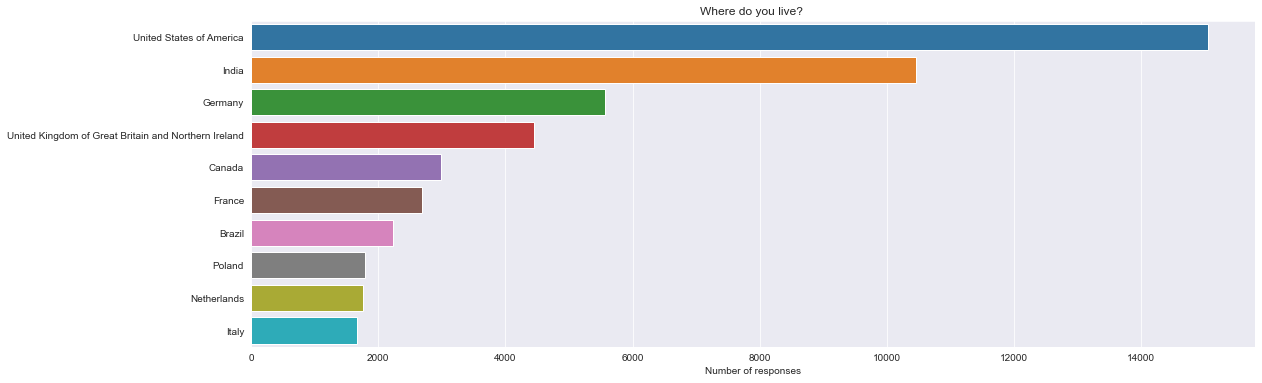

In [46]:
plt.figure(figsize = (18,6))
plt.title(survey_schema_df.Country.split('<')[0])
p = sns.barplot(y=top_10_countries.index, x=top_10_countries);
p.set_xlabel("Number of responses")

About 15000 responses are from USA and about 10000 are from India (as we had seen earlier). These two top countries alone make up about 30% of the total responses. We can infer that the SO community has a very high representation from USA and India. Now, we can also say that people from USA and India are more likely to answer surveys than other people because the survey is available only in English.

##### Here we would be specifically looking at India Specific Dataframe. If you want to have a look at global stats, you will find the official Stack Overflow analysis [here](https://insights.stackoverflow.com/survey/2021).

#### Gender Demographics in India
Let's see how the developer community is represented by various genders in India in comparison to the world.

In [47]:
Gender_data_ind = survey_ind_df.Gender.value_counts()
Gender_data = survey_df.Gender.value_counts()

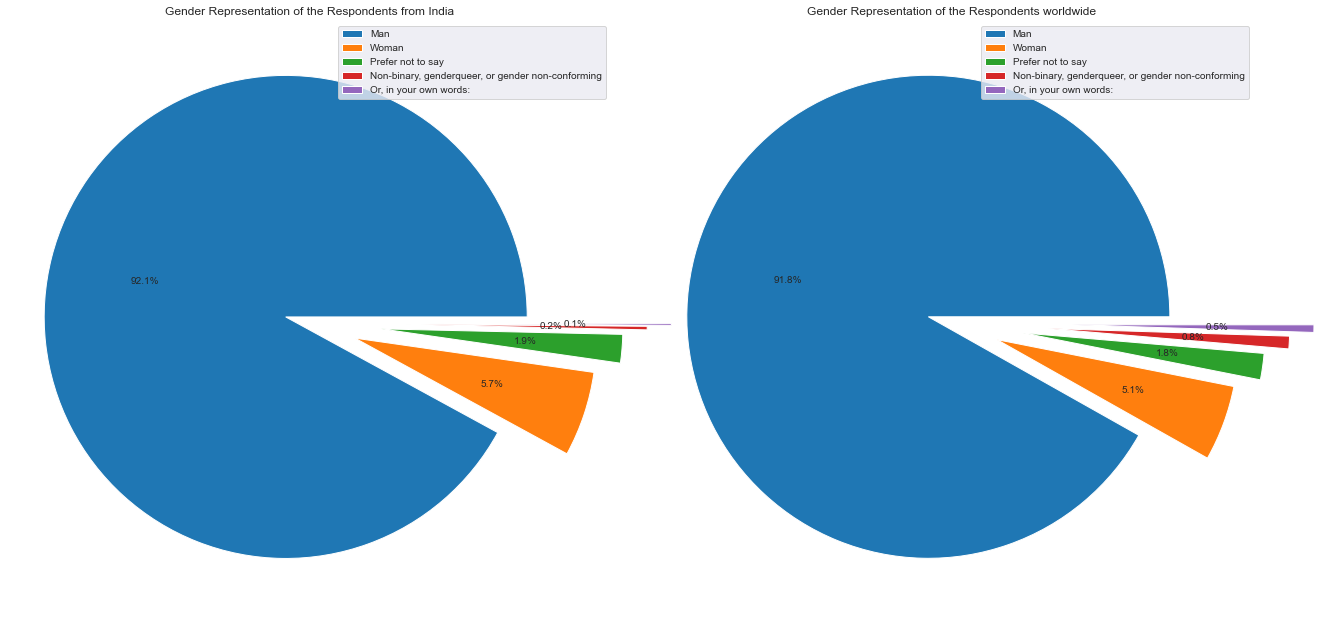

In [48]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18,9))
fig.tight_layout()

explode = [0.1, 0.2, 0.3, 0.4, 0.5]
mylabels = Gender_data.index

ax1.set_title("Gender Representation of the Respondents from India")
ax1.pie(Gender_data_ind, autopct='%0.1f%%', explode=explode);
ax1.legend(mylabels)

ax2.set_title("Gender Representation of the Respondents worldwide")
ax2.pie(Gender_data, autopct='%0.1f%%', explode=explode);
ax2.legend(mylabels)

Sadly enough, the gender divide is pretty huge. There is very less representation from the female and the non-binary, genderqueer and gender non-conforming. Huge imbalance with about 92% of the respondents being male. Though the field is male dominated, the representation of other gender should be a bit better. Or, we can say that men are more likely to respond to a survey than other genders.

Another interesting inference is that in India, there are very few non-binary gender people according to the survey and a lot of people who are not comfortable to share their gender (as compared to the world). Hence, we can safely infer that the third gender concept is still quite alien in India and because people from other genders do not accept them easily, and so, "Prefer not to say".

#### Age Demographics in India
Let's see the age ranges of the respondents and find something useful.

[Text(0, 0, 'Under 18 years old'),
 Text(1, 0, '18-24 years old'),
 Text(2, 0, '25-34 years old'),
 Text(3, 0, '35-44 years old'),
 Text(4, 0, '45-54 years old'),
 Text(5, 0, '55-64 years old'),
 Text(6, 0, '65 years or older')]

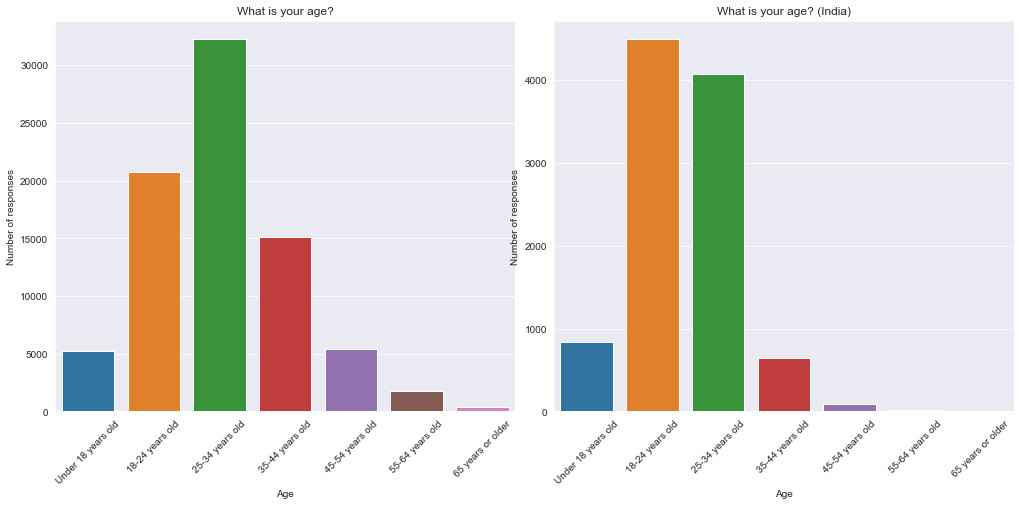

In [49]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))
fig.tight_layout()

ax1.set_title(survey_schema_df.Age.split('<')[0])
sns.countplot(x="Age", data=survey_df, ax=ax1, order=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"]);
ax1.set_ylabel("Number of responses");
ax1.set_xticklabels(labels=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"], rotation=45)

ax2.set_title(survey_schema_df.Age.split('<')[0] + " (India)")
sns.countplot(x="Age", data=survey_ind_df, ax=ax2, order=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"]);
ax2.set_ylabel("Number of responses");
ax2.set_xticklabels(labels=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"], rotation=45)

The majority of the stack overflow users can be found to be within the age bracket of 18 to 34 with around 55000 of the responses. We can safely assume that college students and job freshers and trainees visit stack overflow for solving their problems (or, that young people are more likely to take surveys than middle aged and old people). But how frequently do they need help ? Let's find out.

There aren't much respondents from India in the age bracket 45 and older. So, it can be said that compared to other places, people in India had a later exposure to the Internet and related stuff. And, so the newer generation has more representation.

#### Age VS SO visiting frequency (India) 
Does Age and SO visiting frequency have a relation? If so, let's find out !

In [50]:
survey_schema_df["SOVisitFreq"]

'How frequently would you say you visit Stack Overflow?'

Text(0, 0.5, 'Number of responses')

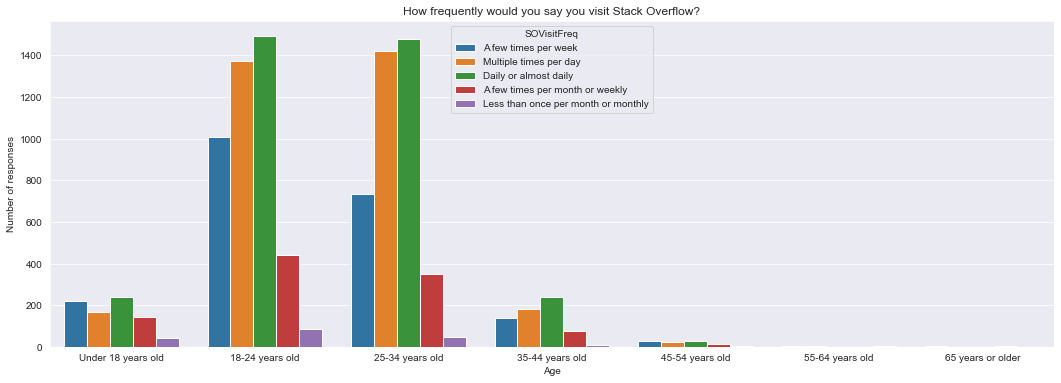

In [51]:
plt.figure(figsize=(18, 6))
plt.title(survey_schema_df.SOVisitFreq.split('<')[0])
p = sns.countplot(x="Age", hue="SOVisitFreq", data=survey_ind_df, order=["Under 18 years old", "18-24 years old", "25-34 years old", "35-44 years old", "45-54 years old", "55-64 years old", "65 years or older"])
p.set_ylabel("Number of responses")

In most age groups, people usually use stack overflow daily or almost daily or a few times a week. As Age increases so does experience, and so people do not need to search for things on stack overflow very often. Also, in the "45 years or older" bracket, the popular usage is a few times a month or a week, which strengthens our assumption.

But, this metric was rather crude. Let's find the effect of Years of professional coding on the frequency of visiting Stack Overflow.

#### Years of professional coding VS SO visiting frequency (India)
Let's reaffirm our last theory.

In [52]:
survey_ind_df.YearsCodePro.value_counts().sample(5)

5.0     611
19.0      5
8.0     329
20.0     43
16.0     50
Name: YearsCodePro, dtype: int64

The YearsCodePro is a numeric feature and for this analysis we would need to convert it into a range just like our Age feature.

In [ ]:
survey_ind_df.loc[survey_ind_df.YearsCodePro >= 30, "YearsCodeProRange"] = "More Than 30 Years"
survey_ind_df.loc[survey_ind_df.YearsCodePro < 30, "YearsCodeProRange"] = "15 - 30 Years"
survey_ind_df.loc[survey_ind_df.YearsCodePro < 15, "YearsCodeProRange"] = "5 - 15 Years"
survey_ind_df.loc[survey_ind_df.YearsCodePro < 5, "YearsCodeProRange"] = "Less Than 5 Years"

Text(0, 0.5, 'Number of responses')

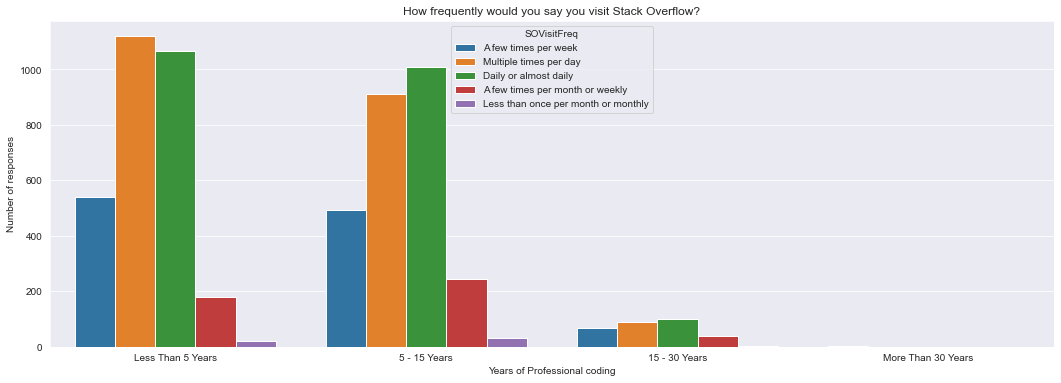

In [54]:
plt.figure(figsize=(18, 6))
plt.title(survey_schema_df.SOVisitFreq.split('<')[0])
p = sns.countplot(x="YearsCodeProRange", hue="SOVisitFreq", data=survey_ind_df, order=["Less Than 5 Years", "5 - 15 Years", "15 - 30 Years", "More Than 30 Years"]);
p.set_xlabel('Years of Professional coding')
p.set_ylabel('Number of responses')

There, we go. Now that we are comparing with the years of professional coding, we can clearly see that people with more coding experience visit SO less frequently.

#### Gender representation in the industry over years
Here, we want to see how the genders are represented now and how it were before.

Text(0, 0.5, 'Number of responses')

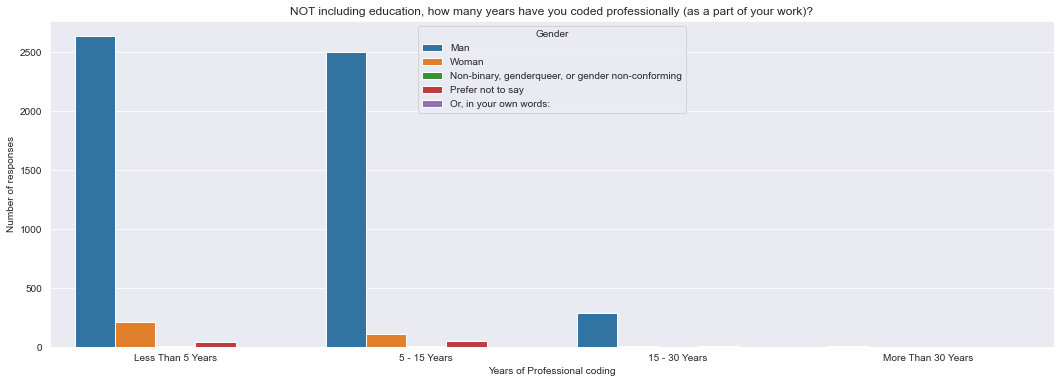

In [156]:
plt.figure(figsize=(18, 6))
plt.title(survey_schema_df.YearsCodePro.split('<')[0])
p = sns.countplot(x="YearsCodeProRange", hue="Gender", data=survey_ind_df, order=["Less Than 5 Years", "5 - 15 Years", "15 - 30 Years", "More Than 30 Years"]);
p.set_xlabel('Years of Professional coding')
p.set_ylabel('Number of responses')

From the graph, we can infer that few decades back, there weren't many woman or non binary gender in the community. It used to be a male dominated comunity. But the silver lining is that slowly the representation of the other genders are getting better, especially in the last 2 decades. But, we still have a long way to go.

Again, here we find that the non binary gender is inappropriately represented till date. And simultaneously, "Prefer not to say" is in good amount, inferring the same that we found out before.

#### Educational Qualifications and Employment Status in India


Let's now see the employment status of the respondents in India.

Text(0.5, 0, 'Number of responses')

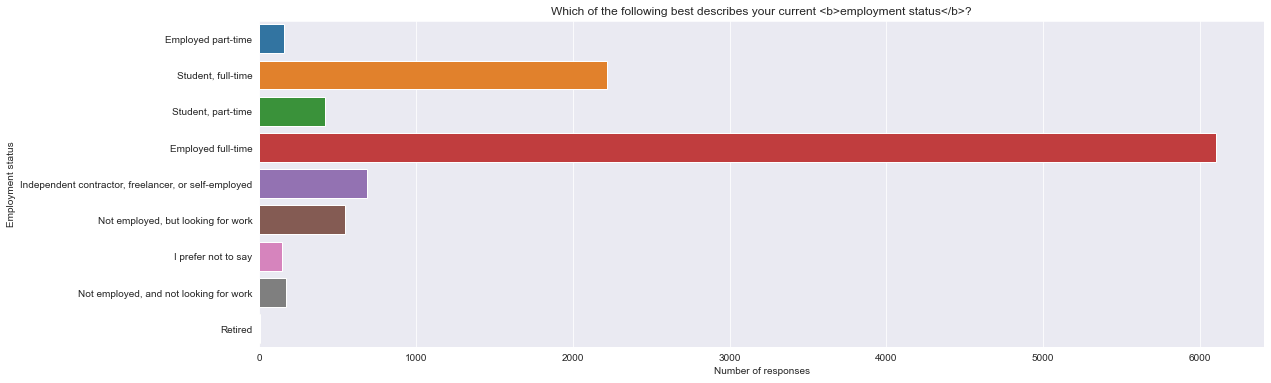

In [56]:
plt.figure(figsize = (18,6))
plt.title(survey_schema_df.Employment.split('*')[0])
p = sns.countplot(y="Employment", data=survey_ind_df);
p.set_ylabel('Employment status')
p.set_xlabel('Number of responses')

Most of the respondents are full time employees, with little contribution from freelancers and students.

Let's visualize the Education Levels of the Unemployed people, "Not employed, but looking for work", in India again.

In [57]:
not_employee_df = survey_ind_df.loc[survey_ind_df["Employment"] == "Not employed, but looking for work"]

Text(0.5, 0, 'Number of responses')

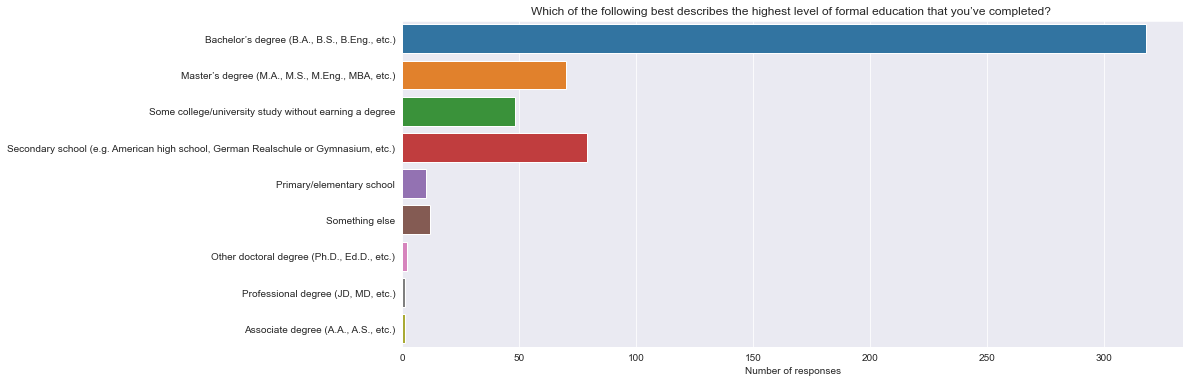

In [58]:
plt.figure(figsize = (14,6))
plt.title(survey_schema_df.EdLevel.split('*')[0])
p = sns.countplot(y="EdLevel", data=not_employee_df);
p.set_ylabel('')
p.set_xlabel('Number of responses')

The unemployed people in India are majorly Bachelor degree holder or those who have completed secondary school. Even after a Masters degree, it seems people are still struggling to get into jobs. People with Professional degrees or Doctoral degree, however seems to have been better off. 

Let's affirm this hypothesis by calculating ratio of number of unemployed people to total nunmber of people in each category.

In [59]:
ratio_umemploy = not_employee_df.EdLevel.value_counts() / survey_ind_df.EdLevel.value_counts()

Text(0.5, 0, 'Ratio of umemployment in India')

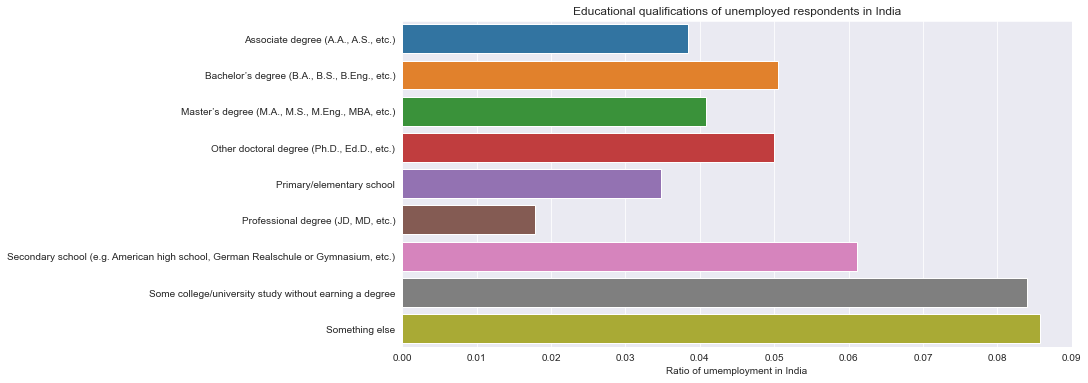

In [60]:
plt.figure(figsize = (12,6))
plt.title("Educational qualifications of unemployed respondents in India")
p = sns.barplot(x=ratio_umemploy, y=ratio_umemploy.index);
p.set_ylabel('')
p.set_xlabel('Ratio of umemployment in India')

Comparing these ratios, it is observed that the no of unemployed professional degree holder to the no of people with professional degree is the lowest. Comparing the ratios of the master degree holder and the professional degree, we can infer that it is better to go for a professional degree (if possible) than masters or associate degree if a person is looking for a job after the degree's completion. 

#### Current Job of the respondents (India)
Let's see what all jobs are people of India doing.

In [61]:
survey_ind_df.DevType.value_counts()

Developer, full-stack                                                                                                                                                                                                                                                                                                                                                                1073
Developer, back-end                                                                                                                                                                                                                                                                                                                                                                   763
Developer, mobile                                                                                                                                                                                                                                   

A person can have many types of roles in the industry and hence, the responses have multiple roles separated by semi-colons. Therefore, we have to separate all the options in order to have a better understanding. Let's have a new boolean data frame with all the roles as columms.
The split_column(col) splits a column with multiple options into a data frame with columns as the options.

In [62]:
def split_column(col):
    new_df = col.to_frame()
    options = []
    for idx, value  in col[col.notnull()].iteritems():
        # segregate the variuod options into columns
        for option in value.split(';'):
            # if the option is already not a cloumn
            if not option in new_df.columns:
                options.append(option)
                # fill the new column with Falses
                new_df[option] = False
            new_df.at[idx, option] = True
    return new_df[options]

In [63]:
devType_df = split_column(survey_ind_df.DevType)

In [64]:
devType_df

,"Developer, front-end","Developer, full-stack","Developer, mobile","Developer, back-end","Developer, desktop or enterprise applications",Database administrator,DevOps specialist,Designer,System administrator,Marketing or sales professional,...,Product manager,Data scientist or machine learning specialist,"Developer, QA or test","Developer, game or graphics","Engineer, site reliability","Engineer, data",Academic researcher,Scientist,Educator,"Senior Executive (C-Suite, VP, etc.)"
8,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
52,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83399,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83406,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83410,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83411,False,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


Now, we have the dataframe ready. We will now find the percentages of the roles that the respondents from India have in the industry.

In [65]:
# in percentage
devType_plot = (devType_df.mean()*100).sort_values(ascending=False)

Text(0.5, 0, 'Percentage')

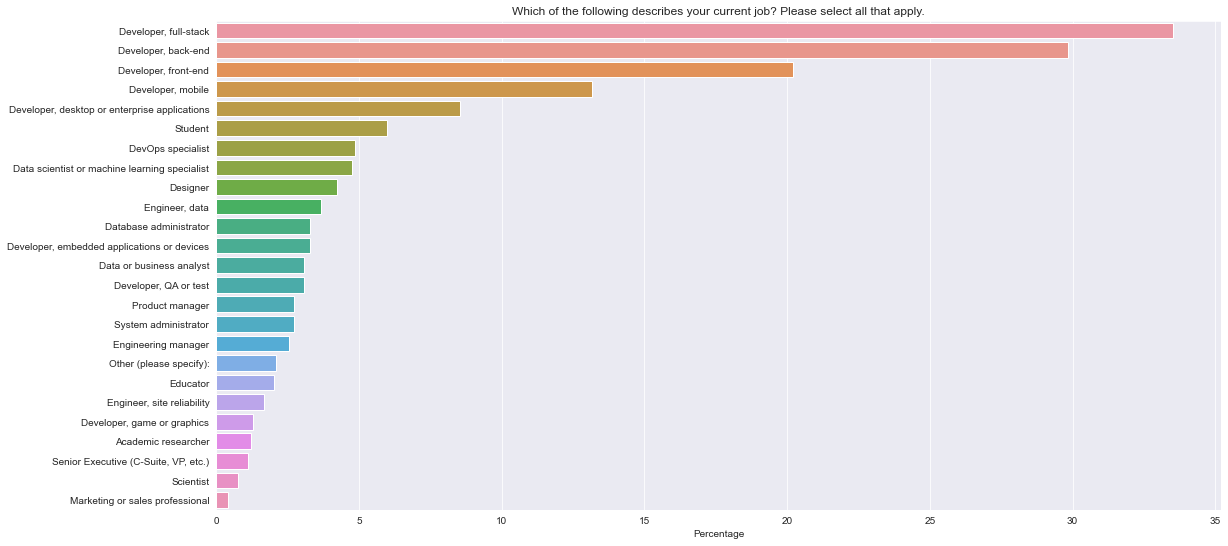

In [66]:
plt.figure(figsize = (18,9))
plt.title(survey_schema_df.DevType.split('<')[0])
sns.barplot(y=devType_plot.index, x=devType_plot);
plt.xlabel('Percentage')

As SO is mainly a forum for develop related stuff, we expected to see a high percentage of developers (full-stack, front-end and back-end) than others.

#### Programming, Scripting and Markup Languages Loved (Indian Edition)
Let's see the languages that the respondents have worked with this year and then we will see the languages they are interested to work with in the upcoming year.

In [67]:
survey_ind_df.LanguageHaveWorkedWith.sample(5)

78288          Bash/Shell;C;C++;HTML/CSS;JavaScript;Python
37142    Bash/Shell;C;C#;HTML/CSS;JavaScript;Node.js;Py...
54959                                      Java;Python;SQL
80303    HTML/CSS;Java;JavaScript;Node.js;Python;SQL;Ty...
18254       Bash/Shell;HTML/CSS;JavaScript;Node.js;PHP;SQL
Name: LanguageHaveWorkedWith, dtype: object

In [68]:
LangWorkWith_df = split_column(survey_ind_df.LanguageHaveWorkedWith)
LangWorkWithGlo_df = split_column(survey_df.LanguageHaveWorkedWith)

In [69]:
LangWorkWith_df

,HTML/CSS,JavaScript,C#,Python,C,C++,Node.js,Java,Kotlin,SQL,...,Julia,Groovy,F#,LISP,Elixir,APL,Erlang,COBOL,Delphi,Clojure
8,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
22,True,False,True,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
39,True,True,True,True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
49,True,True,False,True,True,False,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False
52,True,True,False,True,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83399,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83406,False,False,False,True,True,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83410,False,True,False,True,False,True,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
83411,False,True,False,False,False,False,False,True,False,True,...,False,False,False,False,False,False,False,False,False,False


In [70]:
LangWorkWith_plot = (LangWorkWith_df.mean()*100).sort_values(ascending=False)
LangWorkWithGlo_plot = (LangWorkWithGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 52.0, 'Percentage')

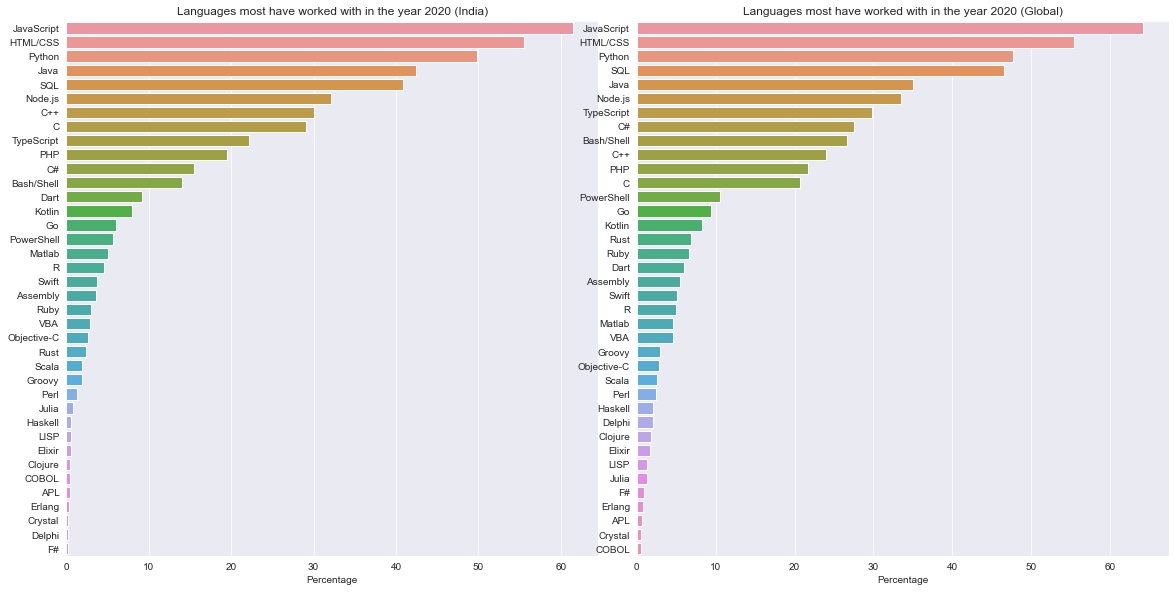

In [71]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.tight_layout()

ax1.set_title("Languages most have worked with in the year 2020 (India)")
sns.barplot(y=LangWorkWith_plot.index, x=LangWorkWith_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Languages most have worked with in the year 2020 (Global)")
sns.barplot(y=LangWorkWithGlo_plot.index, x=LangWorkWithGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

JavaScript, HTML/CSS and Python are the most worked with languages of 2020 in India and as well as worldwide.
COBOL is the least worked with language worldwide, but across India, it is more used than languages like F#, Delphi, etc. India still has a good base of developers who work with Java, C and C++.

In [72]:
survey_ind_df.LanguageWantToWorkWith.sample(5)

72693                                                  NaN
61797                                                  C++
48554    Bash/Shell;Go;HTML/CSS;JavaScript;Node.js;SQL;...
16665                                           PHP;Python
24919     Dart;HTML/CSS;Java;JavaScript;Node.js;TypeScript
Name: LanguageWantToWorkWith, dtype: object

In [73]:
LangInterested_df = split_column(survey_ind_df.LanguageWantToWorkWith)
LangInterestedGlo_df = split_column(survey_df.LanguageWantToWorkWith)

In [74]:
LangInterested_plot = (LangInterested_df.mean()*100).sort_values(ascending=False)
LangInterestedGlo_plot = (LangInterestedGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 52.0, 'Percentage')

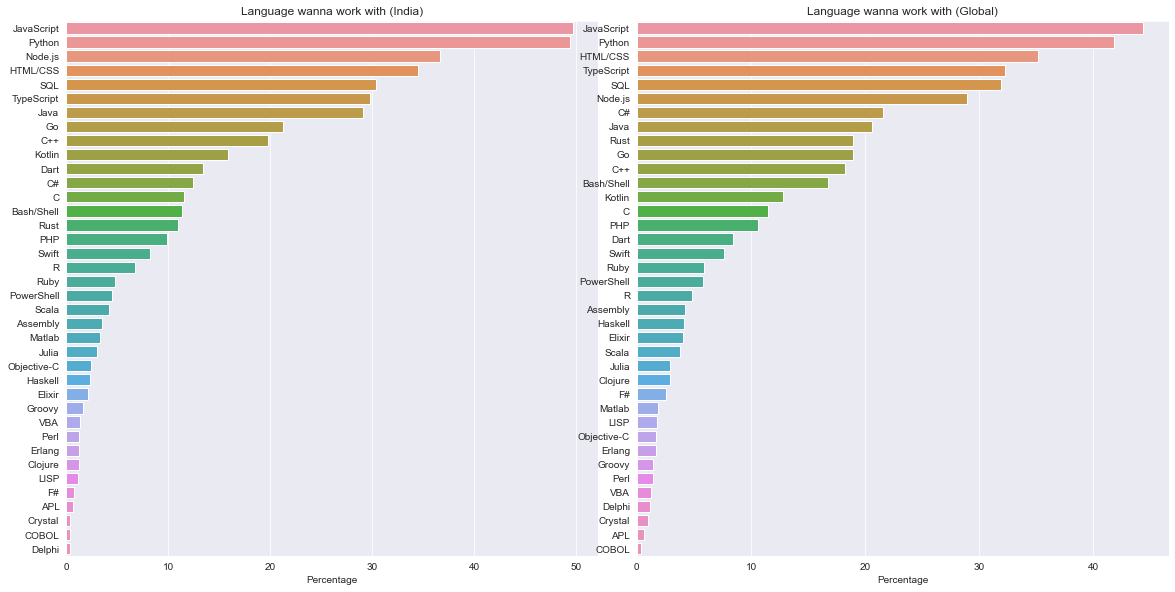

In [75]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.tight_layout()

ax1.set_title("Language wanna work with (India)")
sns.barplot(y=LangInterested_plot.index, x=LangInterested_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Language wanna work with (Global)")
sns.barplot(y=LangInterestedGlo_plot.index, x=LangInterestedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

JS, Python, Node.js are the languages people wanna work with in India. 

Now, the most loved language is calculated as the AND of languages worked with and languageswanna work with followed by the division by and sum of languages worked with. 

In [76]:
LangLoved_df = LangWorkWith_df & LangInterested_df
LangLovedGlo_df = LangWorkWithGlo_df & LangInterestedGlo_df

In [77]:
LangLoved_plot = (LangLoved_df.sum() * 100 / LangWorkWith_df.sum()).sort_values(ascending=False)
LangLovedGlo_plot = (LangLovedGlo_df.sum() * 100 / LangWorkWithGlo_df.sum()).sort_values(ascending=False)

Text(0.5, 34.0, 'Percentage')

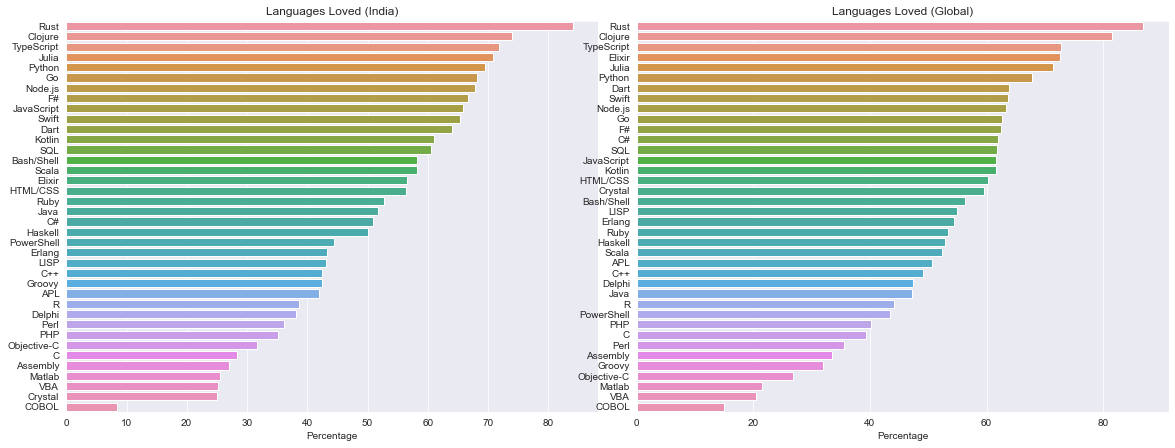

In [78]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,6))
fig.tight_layout()

ax1.set_title("Languages Loved (India)")
sns.barplot(y=LangLoved_plot.index, x=LangLoved_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Languages Loved (Global)")
sns.barplot(y=LangLovedGlo_plot.index, x=LangLovedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

[Rust is the most loved language globally](https://stackoverflow.blog/2020/01/20/what-is-rust-and-why-is-it-so-popular) and also in India. This is totally unexpected. But it is said that people working with Rust tend to fall in love with it, i.e. Rust retain its user more than any other language. These kinds of results are a feast to a analyst.

#### DataBases Loved (Indian Edition)
Let's do the similar type of analysis with DataBases.

In [79]:
DBWorkWith_df = split_column(survey_ind_df.DatabaseHaveWorkedWith)
DBWorkWithGlo_df = split_column(survey_df.DatabaseHaveWorkedWith)

In [80]:
DBWorkWith_plot = (DBWorkWith_df.mean()*100).sort_values(ascending=False)
DBWorkWithGlo_plot = (DBWorkWithGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 52.0, 'Percentage')

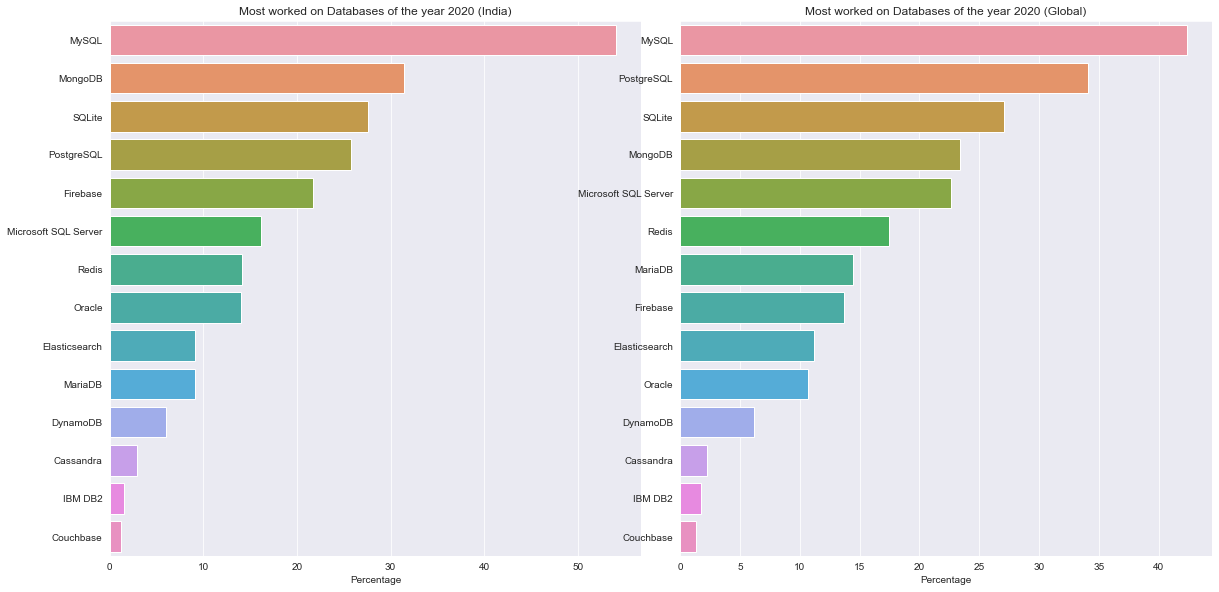

In [81]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.tight_layout()

ax1.set_title("Most worked on Databases of the year 2020 (India)")
sns.barplot(y=DBWorkWith_plot.index, x=DBWorkWith_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Most worked on Databases of the year 2020 (Global)")
sns.barplot(y=DBWorkWithGlo_plot.index, x=DBWorkWithGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

The most worked with database of the year 2020 is MySQL, both across India and Worldwide. The three out of the top four database suites are SQL-based. Only the second is a NoSQL, i.e. MongoDB.

In [82]:
DBInterested_df = split_column(survey_ind_df.DatabaseWantToWorkWith)
DBInterestedGlo_df = split_column(survey_df.DatabaseWantToWorkWith)

In [83]:
DBInterested_plot = (DBInterested_df.mean()*100).sort_values(ascending=False)
DBInterestedGlo_plot = (DBInterestedGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 52.0, 'Percentage')

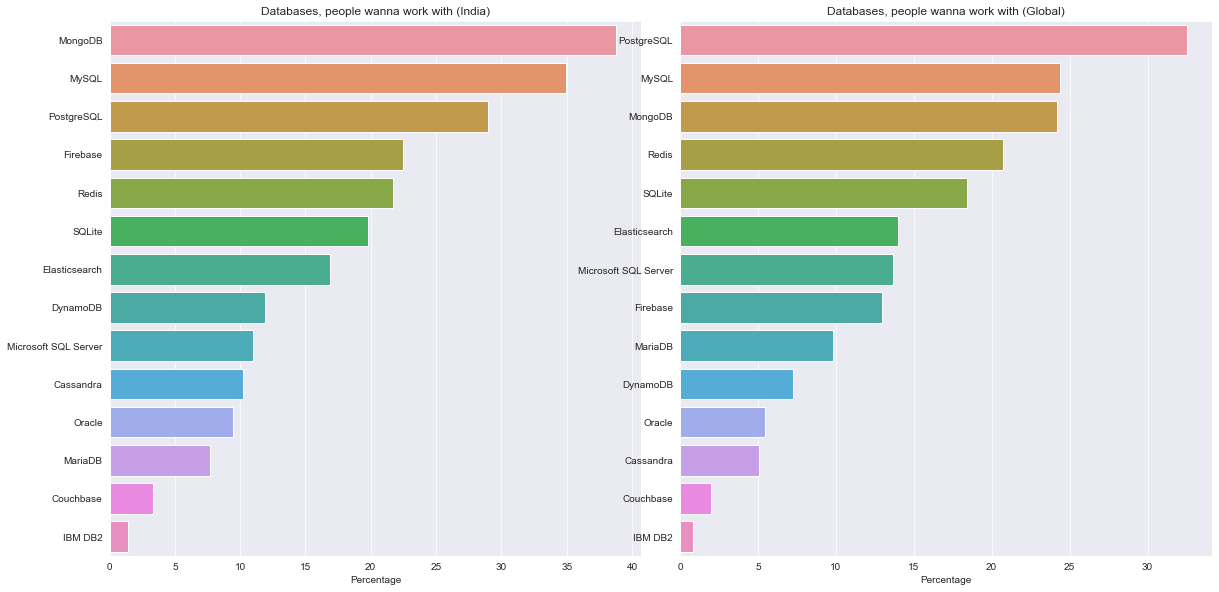

In [84]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.tight_layout()

ax1.set_title("Databases, people wanna work with (India)")
sns.barplot(y=DBInterested_plot.index, x=DBInterested_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Databases, people wanna work with (Global)")
sns.barplot(y=DBInterestedGlo_plot.index, x=DBInterestedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

Globally, PostgreSQL is the database people wanna work with the most. But, in India, the scene is different, people are looking forward to work with MongoDB, which is third on the list globally. NoSQL is gaining attention is India.

In [85]:
DBLoved_df = DBWorkWith_df & DBInterested_df
DBLovedGlo_df = DBWorkWithGlo_df & DBInterestedGlo_df

In [86]:
DBLoved_plot = (DBLoved_df.sum() * 100 / DBWorkWith_df.sum()).sort_values(ascending=False)
DBLovedGlo_plot = (DBLovedGlo_df.sum() * 100 / DBWorkWithGlo_df.sum()).sort_values(ascending=False)

Text(0.5, 34.0, 'Percentage')

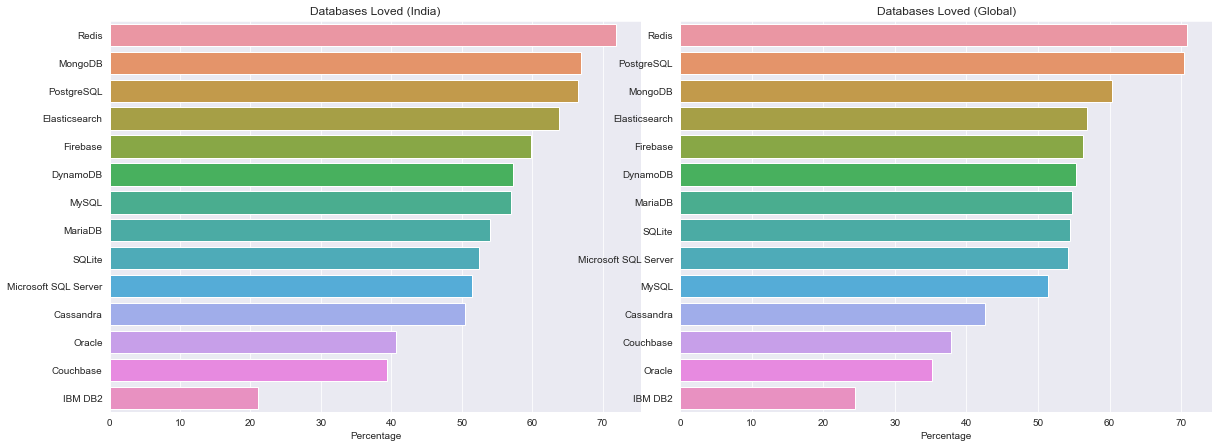

In [87]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,6))
fig.tight_layout()

ax1.set_title("Databases Loved (India)")
sns.barplot(y=DBLoved_plot.index, x=DBLoved_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Databases Loved (Global)")
sns.barplot(y=DBLovedGlo_plot.index, x=DBLovedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

In India and gloablly, people are loving Redis, i.e. Redis retains users more than the rest of its competition, followed by MongoDB, two NoSQL databases on the top.  

#### Cloud Platforms Loved (Indian Edition)
Lets see the most used and loved cloud platforms used in India.

In [88]:
CloudWorkWith_df = split_column(survey_ind_df.PlatformHaveWorkedWith)
CloudWorkWithGlo_df = split_column(survey_df.PlatformHaveWorkedWith)

In [89]:
CloudWorkWith_plot = (CloudWorkWith_df.mean()*100).sort_values(ascending=False)
CloudWorkWithGlo_plot = (CloudWorkWithGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 43.0, 'Percentage')

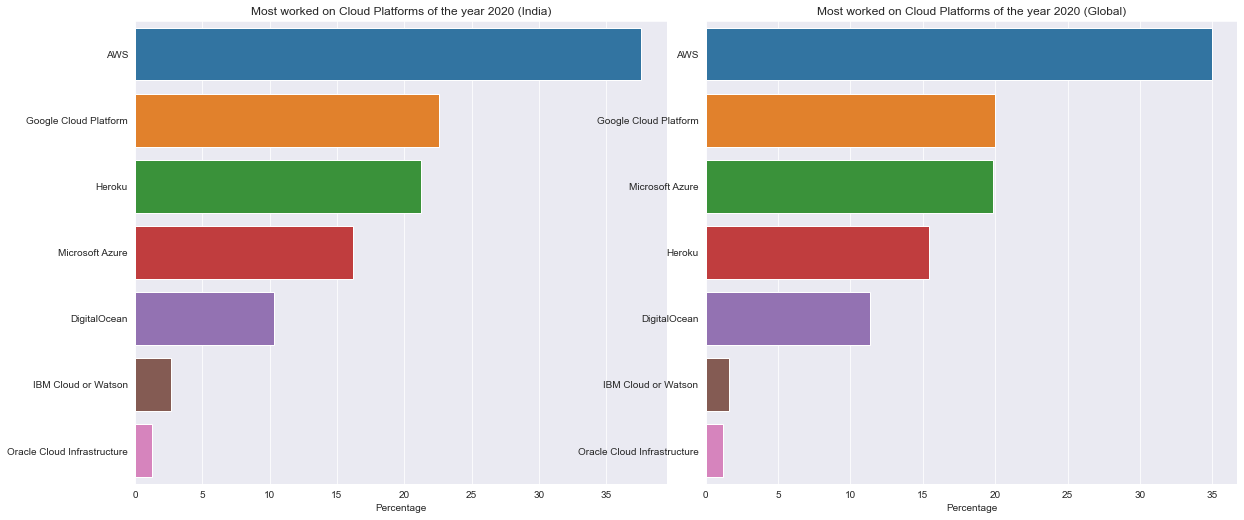

In [90]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,7))
fig.tight_layout()

ax1.set_title("Most worked on Cloud Platforms of the year 2020 (India)")
sns.barplot(y=CloudWorkWith_plot.index, x=CloudWorkWith_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Most worked on Cloud Platforms of the year 2020 (Global)")
sns.barplot(y=CloudWorkWithGlo_plot.index, x=CloudWorkWithGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

AWS is the most worked with database, globally and across India.

In [91]:
CloudInterested_df = split_column(survey_ind_df.PlatformWantToWorkWith)
CloudInterestedGlo_df = split_column(survey_df.PlatformWantToWorkWith)

In [92]:
CloudInterested_plot = (CloudInterested_df.mean()*100).sort_values(ascending=False)
CloudInterestedGlo_plot = (CloudInterestedGlo_df.mean()*100).sort_values(ascending=False)

Text(0.5, 52.0, 'Percentage')

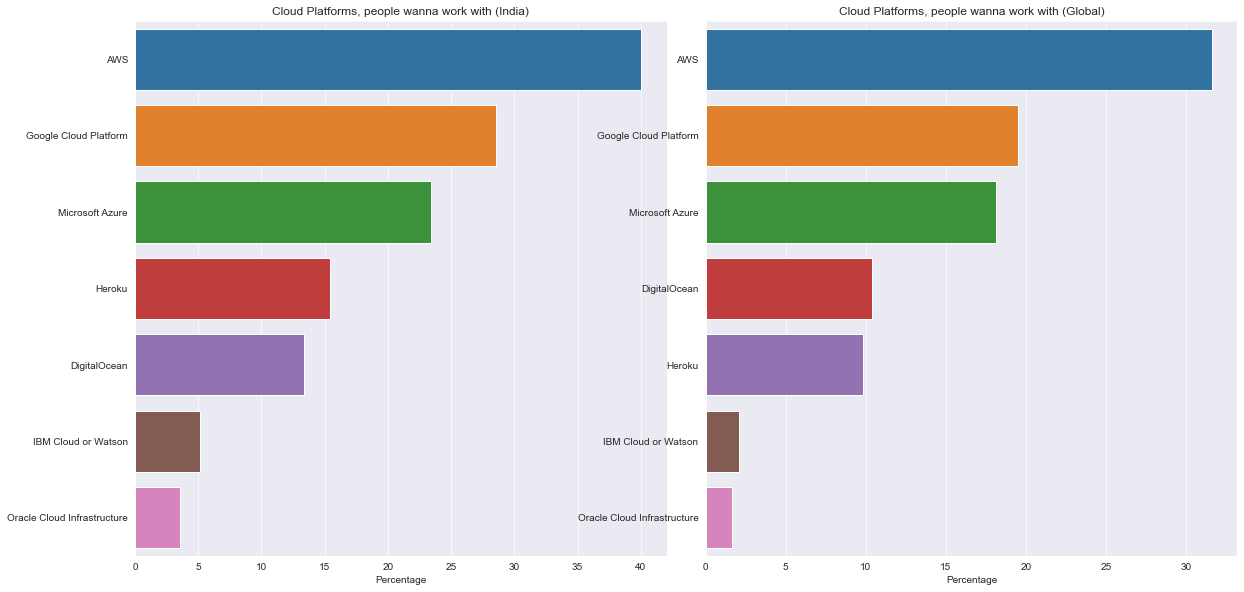

In [93]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,8))
fig.tight_layout()

ax1.set_title("Cloud Platforms, people wanna work with (India)")
sns.barplot(y=CloudInterested_plot.index, x=CloudInterested_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Cloud Platforms, people wanna work with (Global)")
sns.barplot(y=CloudInterestedGlo_plot.index, x=CloudInterestedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

AWS again tops the chart followed by Google Cloud Platform.

In [94]:
CloudLoved_df = CloudWorkWith_df & CloudInterested_df
CloudLovedGlo_df = CloudWorkWithGlo_df & CloudInterestedGlo_df

In [95]:
CloudLoved_plot = (CloudLoved_df.sum() * 100 / CloudWorkWith_df.sum()).sort_values(ascending=False)
CloudLovedGlo_plot = (CloudLovedGlo_df.sum() * 100 / CloudWorkWithGlo_df.sum()).sort_values(ascending=False)

Text(0.5, 43.0, 'Percentage')

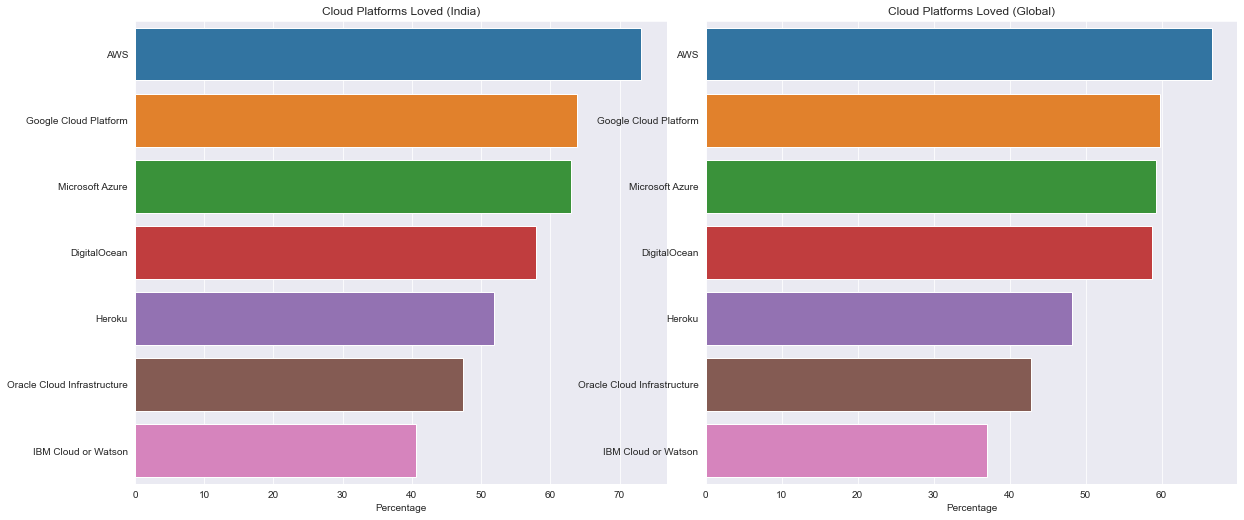

In [96]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=False, figsize=(16,7))
fig.tight_layout()

ax1.set_title("Cloud Platforms Loved (India)")
sns.barplot(y=CloudLoved_plot.index, x=CloudLoved_plot, ax=ax1);
ax1.set_xlabel('Percentage')

ax2.set_title("Cloud Platforms Loved (Global)")
sns.barplot(y=CloudLovedGlo_plot.index, x=CloudLovedGlo_plot, ax=ax2);
ax2.set_xlabel('Percentage')

AWS is the most loved Cloud Platforms which is quite expected, IBM Cloud or Watson is the most dreaded Cloud platform, globally as well as across India.

#### Language of the Hobbyists in India
Let's see which languages hobbyist find interesting and easy to learn.

In [97]:
hobbyist_df = survey_ind_df.loc[survey_ind_df.MainBranch.str.contains("hobby")]

In [98]:
hobby_lang_df = split_column(hobbyist_df.LanguageHaveWorkedWith)

In [99]:
hobby_lang_plot = (hobby_lang_df.mean()*100).sort_values(ascending=False)

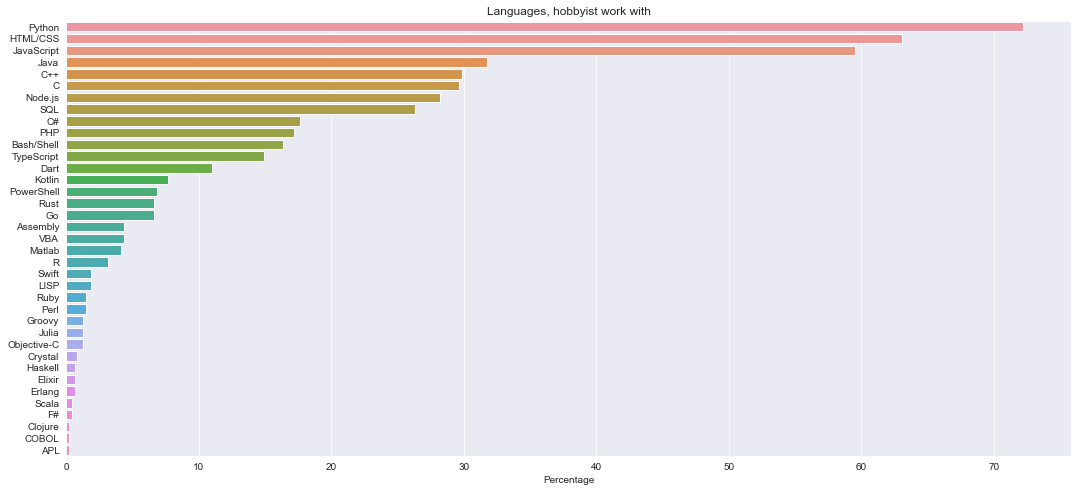

In [100]:
plt.figure(figsize = (18,8))
plt.title("Languages, hobbyist work with")
plt.xlabel('Percentage')
sns.barplot(y=hobby_lang_plot.index, x=hobby_lang_plot);

This states the fact that Python is the most easy-to-learn language. And why not, Python is a general purpose language which suits the needs of the hobbyist, without any tradeoffs as it is a very powerful and versatile language. Though not as fast, but hobbyists do not really go for efficiency.

#### Language of the Developers in India
Let's find the language that professional developers use, i.e. which languages have a good market demand in India in 2020.

In [101]:
dev_df = survey_ind_df.loc[survey_ind_df.MainBranch.str.contains("developer by profession")]

In [102]:
dev_lang_df = split_column(dev_df.LanguageHaveWorkedWith)

In [103]:
dev_lang_plot = (dev_lang_df.mean()*100).sort_values(ascending=False)

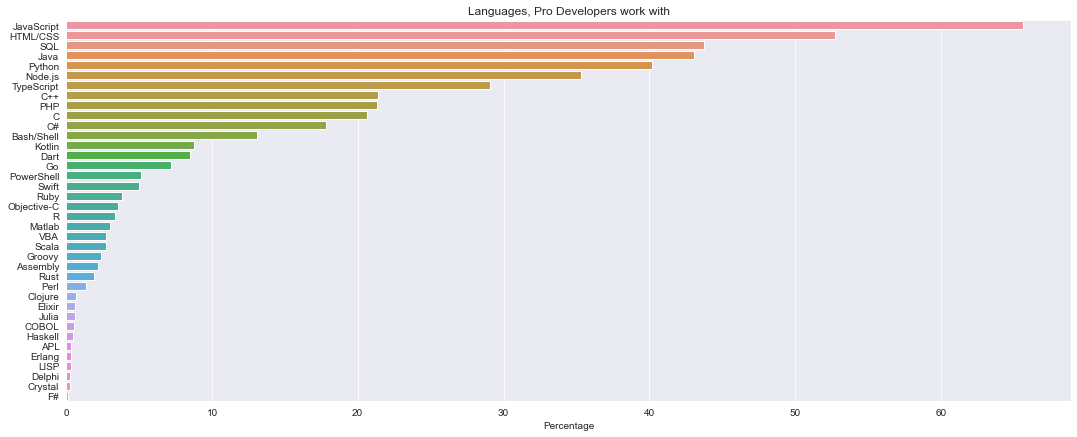

In [104]:
plt.figure(figsize = (18,7))
plt.title("Languages, Pro Developers work with")
plt.xlabel('Percentage')
sns.barplot(y=dev_lang_plot.index, x=dev_lang_plot);

JS, HTML/CSS, SQL form the top threee languages used by professional developers in the year 2020. Python isn't used as extensively as we may have assumed having seen its popularity, still it makes to the top five. Java is still in use and more than Python. So, if you are looking forward to hop onto such careers, you have a fair idea what to go for.

Let's now see what languages people learn as a part of education in India.

#### Language of the Students in India
Let's see what the languages of the students are learning (it may be of their own accord).

In [105]:
stu_df = survey_ind_df.loc[survey_ind_df.MainBranch.str.contains("student", na=False)]

In [106]:
stu_lang_df = split_column(stu_df.LanguageHaveWorkedWith)

In [107]:
stu_lang_plot = (stu_lang_df.mean()*100).sort_values(ascending=False)

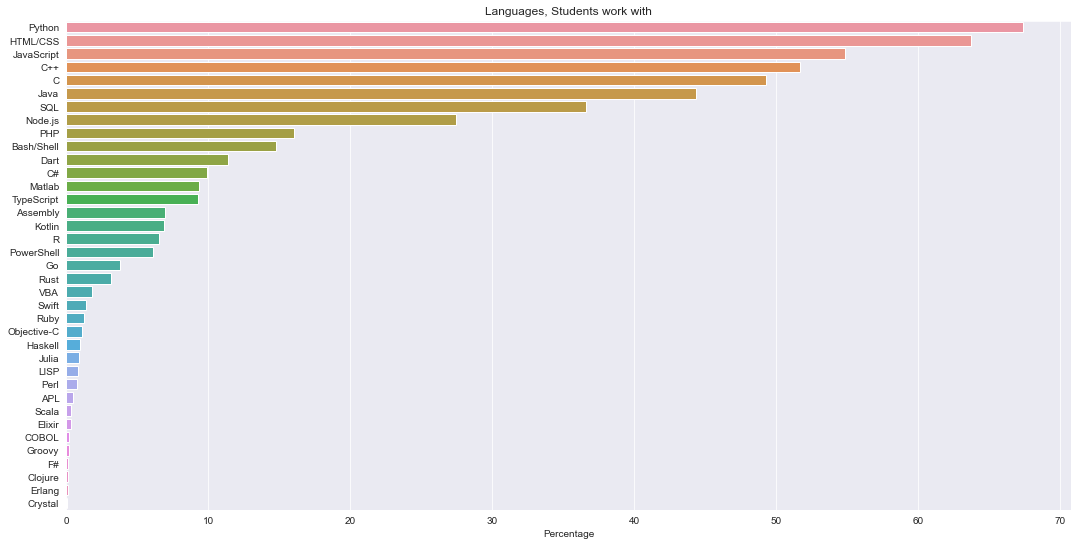

In [108]:
plt.figure(figsize = (18,9))
plt.title("Languages, Students work with")
plt.xlabel('Percentage')
sns.barplot(y=stu_lang_plot.index, x=stu_lang_plot);

Students learn or are taught Python, HTML/CSS, JS, C++, C, Java and SQl. These languages usually form a part of the school and college curriculum. So, the education is India in this regard is not weak at all, or is it?
The next analysis will bring up a clearer picture.

#### Learning Reasourses
Let's see what's the most used learning resources for coding 

In [109]:
learn_df = split_column(survey_ind_df.LearnCode)

In [110]:
learn_plot = (learn_df.mean()*100).sort_values(ascending=False)

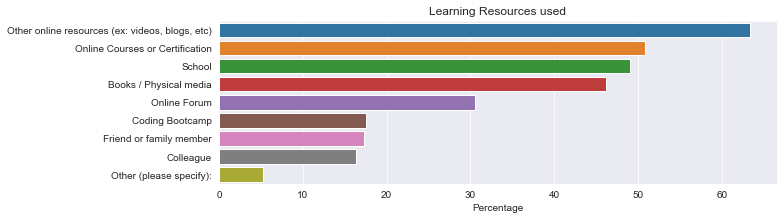

In [111]:
plt.figure(figsize = (10,3))
plt.title("Learning Resources used")
plt.xlabel('Percentage')
sns.barplot(y=learn_plot.index, x=learn_plot);

We can see that people prefer Blogs and Tutorials video to Coding Bootcamps and Certification Courses. Probably, that's because they can learn the language and tech of their choice (not much of a choice is schools) and also that courses and bootcamps are often paid. Also, Schools are a major learning resourse as per survey.

#### Languages Taught in Indian Schools (and Colleges)
Let's now see if the languages taught in schools are upto date with the requirements of the industry.

In [112]:
school_df = stu_df.loc[stu_df.LearnCode.str.contains("School", na=False)]

In [113]:
sch_lang_df = split_column(school_df.LanguageHaveWorkedWith)

In [114]:
sch_lang_plot = (sch_lang_df.mean()*100).sort_values(ascending=False)

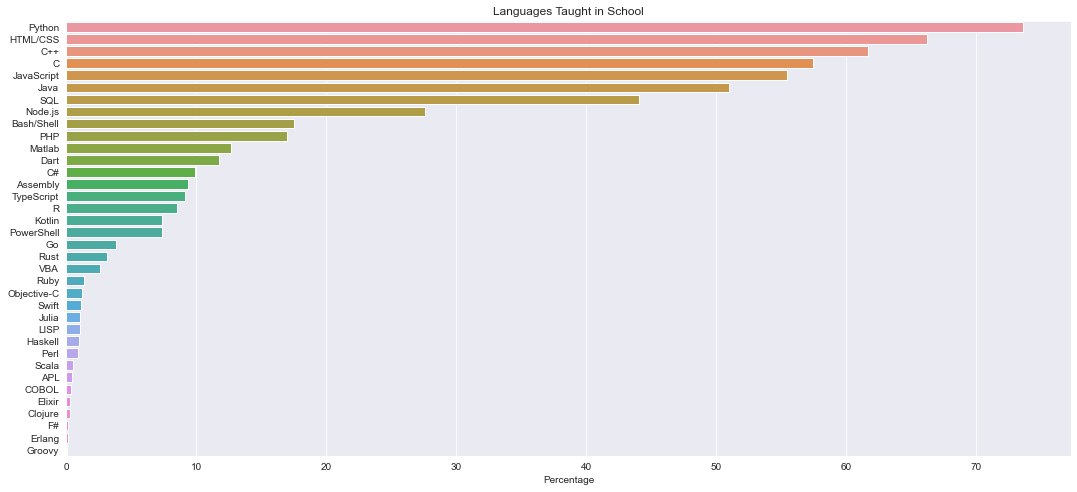

In [115]:
plt.figure(figsize = (18,8))
plt.title("Languages Taught in School")
plt.xlabel('Percentage')
sns.barplot(y=sch_lang_plot.index, x=sch_lang_plot);

Well, as per the survey, Indian education system. in terms of coding, is actually quite good. JavaScript lags behind a bit. A bit more attention to JS might help students just out of schools and colleges to get into good jobs.
C++ and C are way up in the bar graph, though they are not extremely popular amomg developers here. But, these languages though not used by developers, are like the basic languages of coding. So, it gets a green flag here.

#### Years of Professional Coding Required for Job Roles in India
How many years of professional coding are needed for various jobs?

In [116]:
Devtype_lst = []
YearsCodePro_lst = []

# this creates a temporary dataframe with responses of particular job roles and and get the mean of YearsCodePro for each role
for col in devType_df.columns:
    temp_df = survey_ind_df.copy().loc[survey_ind_df.copy().DevType.str.contains(col, na=False)]
    Devtype_lst.append(col)
    YearsCodePro_lst.append(temp_df.YearsCodePro.mean())

C:\Users\mrina\anaconda3\lib\site-packages\pandas\core\strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [117]:
job_years_df = pd.DataFrame()

In [118]:
job_years_df['DevType'] = Devtype_lst
job_years_df['YearsCodePro'] = YearsCodePro_lst

Text(0, 0.5, '')

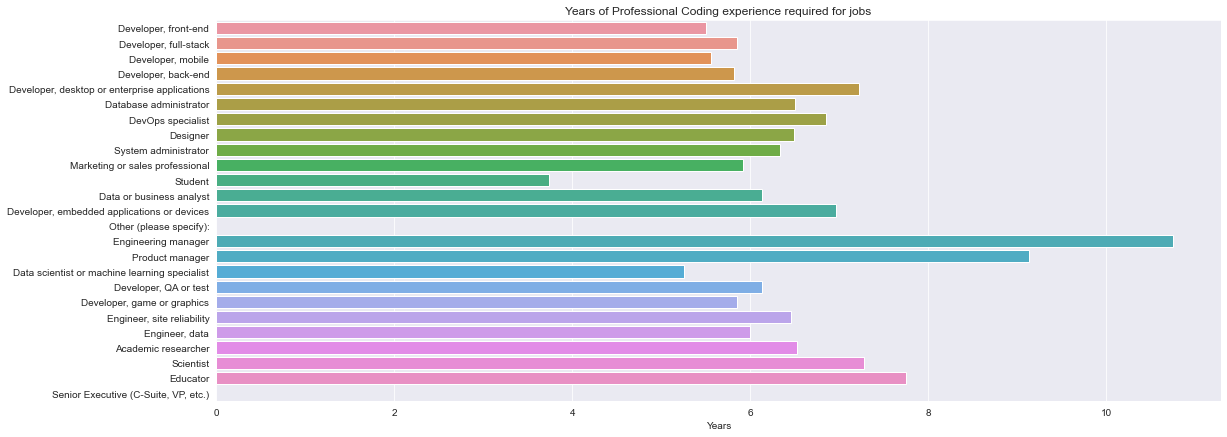

In [119]:
plt.figure(figsize = (18,7))
plt.title("Years of Professional Coding experience required for jobs")
sns.barplot(y=job_years_df.DevType, x=job_years_df.YearsCodePro);
plt.xlabel('Years')
plt.ylabel('')

We can infer that Managerial positions (like Engineering Manager, Product Manager) require the most amount of professional coding experience, followed by Educators. Senior Executive could have been the most demandding of professional coding experience, but sadly we do not have any Senior Executive respondents from India.

#### Operation System widely used by developers and students
Let's see which operating systems are widely used around here.

In [120]:
survey_ind_df.OpSys.value_counts()

Windows                              5538
Linux-based                          2546
MacOS                                2040
Windows Subsystem for Linux (WSL)     250
Other (please specify):                52
BSD                                    10
Name: OpSys, dtype: int64

Text(0, 0.5, '')

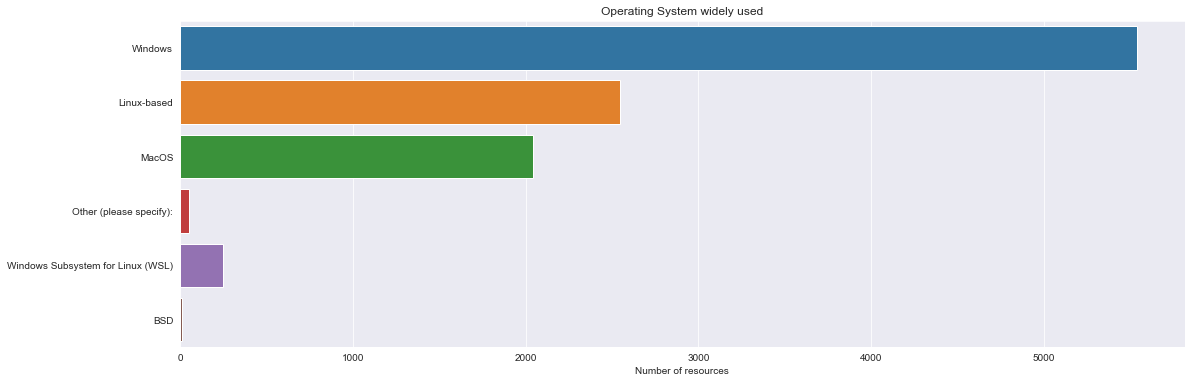

In [121]:
plt.figure(figsize = (18,6))
plt.title("Operating System widely used")
sns.countplot(y='OpSys', data=survey_ind_df);
plt.xlabel('Number of resources')
plt.ylabel('')

Windows alone beats the sum totals of all other OS used by people. But can we get some other results if we catergorize the userbase? Let's do the same analysis for students and professional developers.

Text(83.0, 0.5, '')

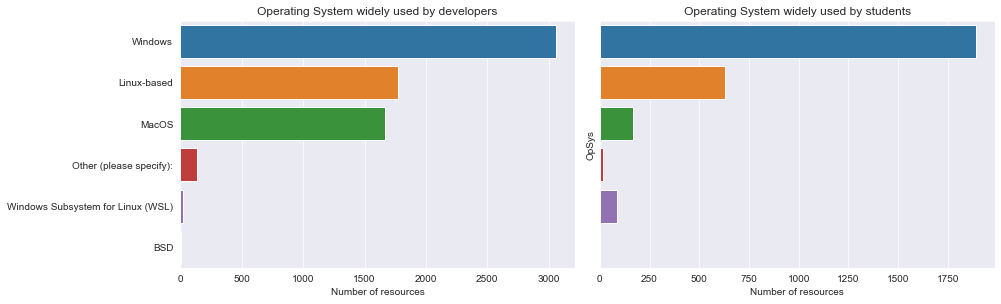

In [122]:
fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(12,4))
fig.tight_layout()

ax1.set_title("Operating System widely used by developers")
sns.countplot(y='OpSys', data=dev_df, ax=ax1);
ax1.set_xlabel('Number of resources')
ax1.set_ylabel('')

ax2.set_title("Operating System widely used by students")
sns.countplot(y='OpSys', data=stu_df, ax=ax2)
ax2.set_xlabel('Number of resources')
ax1.set_ylabel('')

Windows is the most used operation system among both students and professional developers. But if we sum up all the Linux based OS such as Linux, BSD, MacOS, also WSL, we can see that Linux-based Operating Systems are more used than Windows in case of developers. Hence, developers prefer Linux based OS than Windows. 

#### When should you start coding to be a professional developer?
Let's see how age of 1st coding and developer are related.

<AxesSubplot:title={'center':'Age when professional developers first code'}, xlabel='Age1stCode', ylabel='count'>

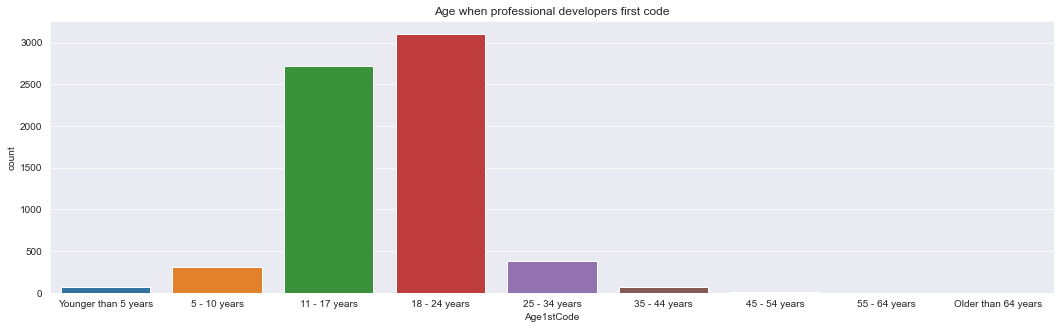

In [123]:
plt.figure(figsize = (18,5))
plt.title("Age when professional developers first code")
plt.xlabel('Percentage')
plt.ylabel('Age of 1st code')
sns.countplot(x=dev_df.Age1stCode, order=['Younger than 5 years', '5 - 10 years', '11 - 17 years', '18 - 24 years', '25 - 34 years', '35 - 44 years', '45 - 54 years', '55 - 64 years', 'Older than 64 years'])

Most of the professional developers start coding at the age of 11 to 24, i.e. they get introduced to coding at schools and colleges. However, there are also professional developers who started their coding journey at the age of 25 - 34 and even some from 35 - 44 years, stating that coding is something that you can start learning even in your late 20s and still build a good career out of it.

Younger than 5 years sounds to good to be true, but because SO developer survey has this option, so, we aren't removing these responses.

#### What do professional developer do when they are stuck?
Let's see what professional developers resort to when they are stuck and can't get over it.

In [124]:
dev_df.NEWStuck.value_counts().sample(10)

Visit Stack Overflow;Google it;Panic;Visit another developer community (please name):                                                                                                                                          3
Other (please specify):                                                                                                                                                                                                        9
Call a coworker or friend;Visit Stack Overflow;Go for a walk or other physical activity;Google it;Do other work and come back later;Panic                                                                                      8
Visit Stack Overflow;Go for a walk or other physical activity;Google it;Play games                                                                                                                                            18
Visit Stack Overflow;Do other work and come back later;Play games;Panic;Other (please specify):     

In [125]:
stuck_df = split_column(dev_df.NEWStuck)

In [126]:
stuck_plot = (stuck_df.mean()*100).sort_values(ascending=False)

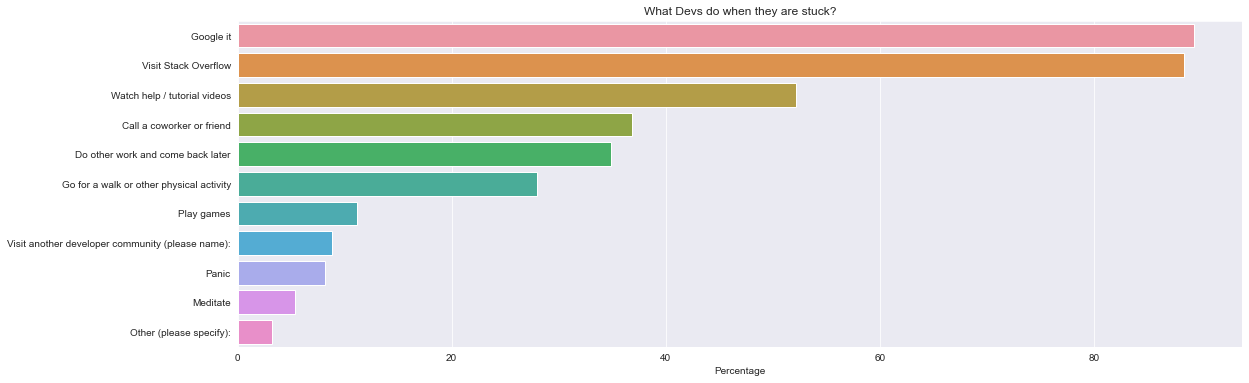

In [127]:
plt.figure(figsize = (18,6))
plt.title("What Devs do when they are stuck?")
plt.xlabel('Percentage')
sns.barplot(y=stuck_plot.index, x=stuck_plot);

Googling the problem and visiting stack overflow are the most widely used methods of finding a solution. Devs when stuck on something, they tend to solve it asap rather than taking a break, going for a walk, playing games or meditating.

#### Mental Health Issues
Let's see the mental healths faced by people in India.

In [128]:
survey_ind_df.MentalHealth.value_counts().sample(5)

I have autism / an autism spectrum disorder (e.g. Asperger's)                                                                                                                            20
None of the above                                                                                                                                                                      7679
I have an anxiety disorder                                                                                                                                                              256
I have a concentration and/or memory disorder (e.g. ADHD);I have a mood or emotional disorder (e.g. depression, bipolar disorder);I have an anxiety disorder;Or, in your own words:       1
I have an anxiety disorder;I have autism / an autism spectrum disorder (e.g. Asperger's)                                                                                                  2
Name: MentalHealth, dtype: int64

In [129]:
mental_health_df = split_column(survey_ind_df.MentalHealth)

In [130]:
mental_health_plot = (mental_health_df.mean()*100).sort_values(ascending=False)

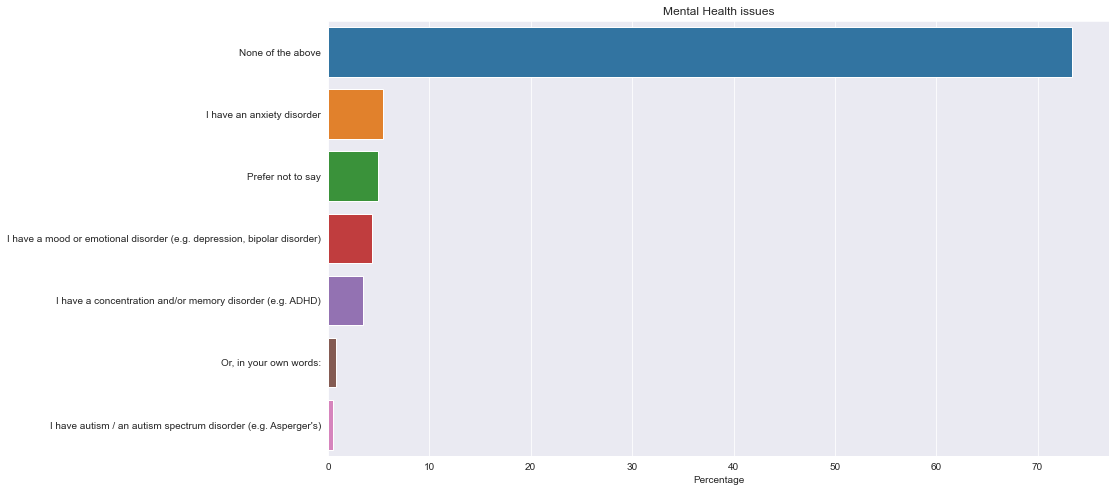

In [131]:
plt.figure(figsize = (14,8))
plt.title("Mental Health issues")
plt.xlabel('Percentage')
sns.barplot(y=mental_health_plot.index, x=mental_health_plot);

Most of the respondents are well off having no issues of mental health. Doing this analysis on students and developers do not yeild very different results.

##### Finally, we have come to the end of the EDA and Data Visualization.

### Data Modelling and PDA
Let's now try to fit a model that predicts the Salary or Compensation yearly based on Job Designation, Educational Qualifications, Age, Gender, Country and Years of professional coding .

In [132]:
data_df = survey_df.copy()
data_df.shape

(82566, 24)

Let's clean these features so that we have a better model.

In [133]:
# Keep only those people who are employed part-time or full-time.
data_df = data_df.loc[(data_df.Employment.str.contains("Employed", na=False))]

# Keep only those people who are developers byy profession.
data_df = data_df.loc[data_df.MainBranch.str.contains("developer by profession", na=False)]

#keep only those data of people belonging to countries having more than 100  responses.
vals = pd.DataFrame(data_df.Country.value_counts() > 100)
vals = vals[vals.Country == True]
Countries100Responses = list(vals.index)
data_df = data_df[data_df.Country.isin(Countries100Responses)]

In [134]:
data_df.shape

(46541, 24)

In [135]:
data_df = data_df.loc[data_df.Age != 'Prefer not to say']
data_df.shape

(46406, 24)

The data has been reduced to 46 thousand.

In [136]:
data_df = data_df.dropna(subset=['YearsCodePro', 'Age', 'EdLevel', 'Country', 'DevType', 'Gender', 'ConvertedCompYearly'], how='any')
data_df.shape

(34282, 24)

First, let us eliminate the outliers, which we will find by looking at the boxplot.

Text(0.5, 0, 'Salary')

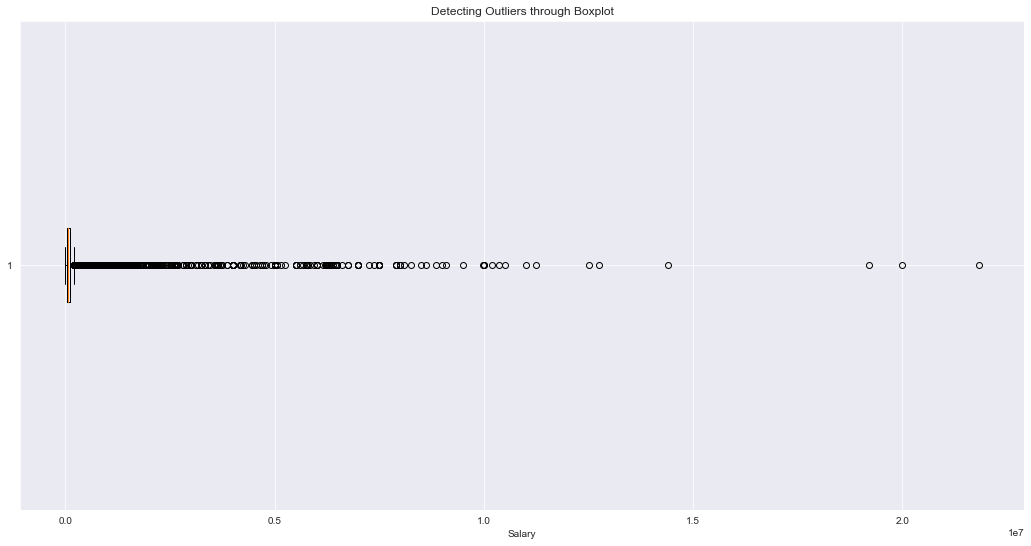

In [137]:
plt.figure(figsize=(18,9))
plt.boxplot(data_df.ConvertedCompYearly, vert=False)
plt.title("Detecting Outliers through Boxplot")
plt.xlabel("Salary")

Let's zoom in to find the lower extreme of the box plot and remove all those data points are beyond the lower extreme.

(205000.0, 215000.0, 0.0, 2.0)

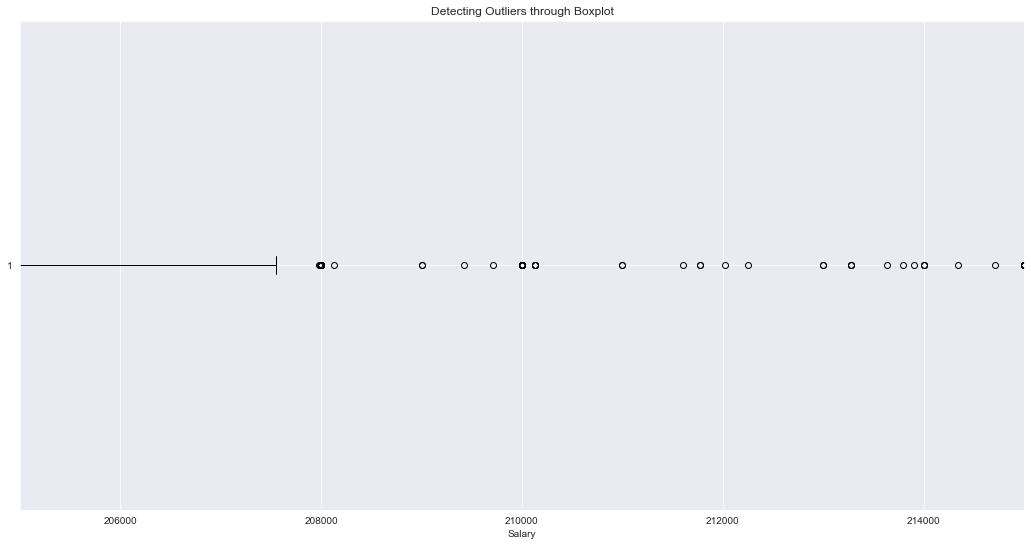

In [138]:
plt.figure(figsize=(18,9))
plt.boxplot(data_df.ConvertedCompYearly, vert=False)
plt.title("Detecting Outliers through Boxplot")
plt.xlabel("Salary")
plt.axis([205000, 215000, 0, 2])

Finally, we have got the outliers and now we will eliminate these values from our dataset.

In [139]:
data_df = data_df.loc[data_df.ConvertedCompYearly < 207900]
data_df.shape

(32097, 24)

Further reduced to 31 thousand.

In [140]:
devTypeGlo = split_column(data_df.DevType)
devTypeGlo = devTypeGlo.astype(int)

Now, we will choose the independent variables for Salary modelling.

In [141]:
X = data_df[['Country', 'EdLevel', 'YearsCodePro', 'Gender', 'Age']]

In [142]:
X = pd.get_dummies(data=X, drop_first=True)
X

,YearsCodePro,Country_Australia,Country_Austria,Country_Bangladesh,Country_Belarus,Country_Belgium,Country_Brazil,Country_Bulgaria,Country_Canada,Country_Chile,...,"Gender_Non-binary, genderqueer, or gender non-conforming","Gender_Or, in your own words:",Gender_Prefer not to say,Gender_Woman,Age_25-34 years old,Age_35-44 years old,Age_45-54 years old,Age_55-64 years old,Age_65 years or older,Age_Under 18 years old
9,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
11,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
12,6.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
16,2.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
17,6.0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83428,7.0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83430,21.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
83434,5.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
83436,4.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [143]:
X = X.join(devTypeGlo)

In [144]:
X.fillna(0, inplace=True)

A dummy variable is a numeric variable that represents categorical data, such as gender, race, etc. As Gender, Job Designation, Education level, Age and Country are categorical data, we will have to introduce dummy variables for each category. This is also called One-Hot encoding.

The value to be train and predicted is set to Y.

In [145]:
Y = data_df['ConvertedCompYearly']

#### Creating a Train and Test dataset
The dataset so obtained after cleaning is split into training and testing datasets in the ratio of 7:3.

In [146]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.7, test_size=0.3, random_state=101)

In [147]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(22467, 104)
(9630, 104)
(22467,)
(9630,)


After splitting the dataset into a test and train, we will be fitting a Linear Regression model.

In [148]:
model = LinearRegression()
model.fit(X_train, Y_train)
print(model.intercept_)

20188.64742795944


The intercept is the expected mean value of Y when all X = 0. In a purely mathematical sense, this definition is correct. Unfortunately, it’s frequently impossible to set all variables to zero because this combination can be an impossible or irrational arrangement.

In [149]:
coeff_parameter = pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
coeff_parameter

,Coefficient
YearsCodePro,1782.051738
Country_Australia,28723.490659
Country_Austria,10630.057270
Country_Bangladesh,-26445.117560
Country_Belarus,-8475.194651
...,...
System administrator,-6820.724226
"Engineer, site reliability",8999.885442
"Senior Executive (C-Suite, VP, etc.)",10247.710789
Educator,650.572676


The sign of each coefficient indicates the direction of the relationship between a predictor variable and the response variable.
Positive sign represents directly proportional and Negative sign indicates indirectly proportional.

In [150]:
predictions = model.predict(X_test)

C:\Users\mrina\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Predicted Data')

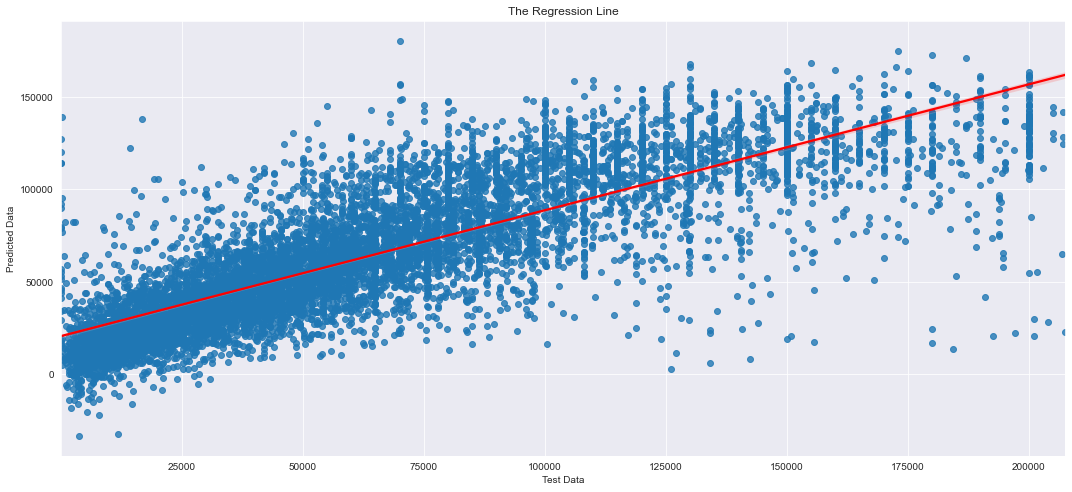

In [151]:
plt.figure(figsize=(18,8))
sns.regplot(Y_test, predictions, line_kws={"color": "red"})
plt.title("The Regression Line")
plt.xlabel('Test Data')
plt.ylabel('Predicted Data')

Finally, this is the line of regression that we have here.

In [152]:
import math

MSE = mean_squared_error(Y_test, predictions)
RMSE = math.sqrt(MSE)
MAE = mean_absolute_error(Y_test, predictions)
R2 = r2_score(Y_test, predictions)
score = model.score(X_test, Y_test)

print(f"The MAE of the model is {MAE}.\nThe MSE of the model is {MSE}.\nThe RMSE of the model is {RMSE}.\nThe R-squared of the model is {R2}.")
print(f"The score of the model (same as R-squared) is {score*100} %")

The MAE of the model is 18001.513521394325.
The MSE of the model is 667637880.1515192.
The RMSE of the model is 25838.6895981882.
The R-squared of the model is 0.6796610758224486.
The score of the model (same as R-squared) is 67.96610758224486 %


The current model is only 68% accurate, which is just, a good enough model. There are many errors that can be clearly made out from the regression plot.

##### We have come to the end of data modelling.

### Predicting values from the working model
Let's predict the salary of a Indian woman of 25 years with a professional degree, with 10 years of professional coding experience, currently working as a Database Administrator.

In [153]:
inde_df = X[X.columns][0:1]
inde_df = inde_df * 0

In [154]:
inde_df["Gender_Woman"] = 1
inde_df["Age_25-34 years old"] = 1
inde_df["Database administrator"] = 1
inde_df["EdLevel_Professional degree (JD, MD, etc.)"] = 1
inde_df["Country_India"] = 1
inde_df["YearsCodePro"] = 10

In [155]:
predicted_salary = model.predict(inde_df)
predicted_salary

array([16049.85765774])

The predicted salary of the Indian woman, 25 of years with a professional degree, with 10 years of professional coding experience, currently working as a Database Administrator is approximately $17000 yearly, which is around 12.5 lakhs per annum.

### Inference and Conclusions of Stack Overflow Developer Survey 2021
1. India and USA respondents from around one-fourth of the total survey respondents. People from India and USA are also more likely to respond to the survey as the survey is available only in English. There are total 180 countries in the survey responses.

##### Now, let's see some India specific stats :-

2. There is very less representation from the females and the other (non-binary, genderqueer and gender non-conforming) genders. The field is male dominated. 
3. In India, there are very few non-binary gender people according to the survey and a lot of people who are not comfortable to share their gender (as compared to the world). Hence, the third gender concept is still quite alien in India and because people from other genders do not accept them easily.
4. We can safely assume that college students and job freshers and trainees visit stack overflow for solving their problems (or, that young people are more likely to take surveys than middle aged and old people).
5. People in India had a later exposure to the internet and related stuff.
6. With the years of professional coding increasing, we can clearly see that people with more coding experience visit SO less frequently.
7. Few decades back, there weren't many woman or non binary gender in the community. It used to be a male dominated community. But slowly the representation of the other genders are getting better, especially in the last 2 decades.
8. The unemployed people in India are majorly Bachelor degree holder or those who have completed secondary school. Even after Masters degree, it seems people are still struggling to get into jobs.
9. It is better to go for a professional degree than masters or associate degree if a person is looking for a job after the degree's completion.
10. As SO is mainly a forum for develop related stuff, we expected to see a high percentage of developers.
11. JavaScript, HTML/CSS and Python are the most worked with languages of 2020 in India and as well as worldwide. COBOL is the least worked with language worldwide, but across India, it is more used than languages like F#, Delphi, etc. JS, Python and HTML/CSS are again the languages people wanna work with.
12. Rust is the most loved language globally and also in India.
13. The most worked with database of the year 2020 is MySQL, both across India and Worldwide. The three out of the top four database suites are SQL-based. Only the second is a NoSQL, i.e. MongoDB. Globally, PostgreSQL is the database people wanna work with the most. But, in India, people are looking forward to work with MongoDB, which is third on the list globally. NoSQL is gaining attention is India.
14. Globally and in India, people are loving Redis.
15. AWS is the most loved Cloud Platforms which is quite expected, IBM Cloud or Watson is the most dreaded Cloud platform, globally as well as across India.
16. Python is a general purpose language which suits the needs of the hobbyist, without any tradeoffs as it is a very powerful and versatile language.
17. JS, HTML/CSS, SQL form the top threee languages used by professional developers in the year 2020. Python isn't used as extensively as we may have assumed having seen its popularity, still it makes to the top five. Java is still in use and more than Python
18. Students learn or are taught Python, HTML/CSS, JS, C++, C, Java and SQl.
19. We can see that people prefer Blogs and Tutorials video to Coding Bootcamps and Certification Courses.
20. Indian education system ,in terms of coding, is actually quite good. JavaScript lags behind a bit. A bit more attention to JS might help students just out of schools and colleges to get into good jobs.
21. Managerial positions (like Engineering Manager, Product Manager) require the most amount of professional coding experience, followed by Educators.
22. Developers prefer Linux based OS than Windows.
23. Most of the professional developers start coding at their teen. However, there are also professional developers who started their coding journey at an older age. Therefore, coding is something that you can start learning even in your late 20s and still build a good career out of it.
24. Googling the problem and visiting stack overflow are the most widely used methods of finding a solution when they are stuck.

25. Most of the respondents are well off having no issues of mental health.

### The Way Forward

- Web Frameworks, Collaboration tools, etc can be analysed for for Web Frameworks loved, Collaboration tools Loved, etc.
- The Language of the Hobbists, Professional Developers and Students can be repeated on Cloud Platforms, Web Frameworks, Collaboration Tools, DBMS, etc, to get more results.
- Compensation can be compared for every country and every profession.

- Like Gender, Sexuality may be compared.
- Years of professional coding may be compared with Compensation.

### End of Project : Exploratory Data Analysis Using Python